<a href="https://colab.research.google.com/github/chloe-dg/GSFM/blob/main/gsfm_project_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 16.9 MB/s 
     |████████████████████████████████| 63 kB 868 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install pyfolio

     |████████████████████████████████| 91 kB 4.3 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=8ca0859467fdf9ef7786e0efe8811dc1641ec5f23e151427c3165a543a990bb0
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=f3bd11b728d47e1a8e1255741ac0614743a5997704219c43e67f4f5433238545
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [ ]:
pip install Riskfolio-Lib

     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 11.2 MB 86.9 MB/s 
     |████████████████████████████████| 149 kB 63.7 MB/s 
     |████████████████████████████████| 902 kB 39.3 MB/s 
     |████████████████████████████████| 9.8 MB 50.7 MB/s 
     |████████████████████████████████| 899 kB 57.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install pandas-datareader

In [ ]:
pip uninstall matplotliby


In [ ]:
pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 13.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
riskfolio-lib 3.0.0 requires matplotlib>=3.3.0, but you have matplotlib 3.0.2 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# 1. Import libraries, process data and create portfolios

## 1.1 Import libraries

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import statsmodels.api as sm
import pyfolio as pf
import riskfolio as rp
from scipy.stats import norm
import seaborn as sns
import holidays
sns.set_style("whitegrid")
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [5, 4.5]
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [ ]:
# high_risk_portfolio_list = ['^IXIC', 'TLT', 'CL=F', 'EEM']
# aapl_df = yf.download(high_risk_portfolio_list, 
#                       start='2019-01-01', 
#                       end='2021-06-12', 
#                       progress=False,
# )['Adj Close']
# aapl_df.head()

## 1.2 Create all functions

In [ ]:
# Create function to get data and remove all holidays in data
cal = calendar()
holidays = cal.holidays(start='2018-01-01', end='2021-12-31')

def get_data(list_, start_date, end_date):
    """Read in daily price(adjusted close) of asset from CSV files for a given set of dates."""
    
    # download daily price data for each of the stocks in the portfolio
    df = yf.download(list_, start=start_date, end = end_date)['Adj Close']
    df = df[df.index.dayofweek < 5]
    df['holidays'] = df.index.isin(holidays)
    df = df.loc[df['holidays'] == False]
    df = df.drop('holidays', 1)
    df.sort_index(inplace = True)
    return df

In [ ]:
# pip uninstall pandas_datareader

In [ ]:
# pip install pandas-datareader

In [ ]:
# pip install yfinance

In [ ]:
# create function to calculate daily return
def calc_daily_returns(df):
    return (df.pct_change())

In [ ]:
# create function to calculate average return of asset
def calc_mean_daily_returns(daily_returns):
    return (daily_returns.mean())

In [ ]:
# create function to create covariance matrix
def create_covariance_matrix(daily_returns):
    return daily_returns.cov()

In [ ]:
# function to calculate porfolio return, portfolio standard deviation, sharpe ratio for each scenratios of asset weights in portfolios
def create_results_dataframe(df, iteration,mean_daily_returns, cov_matrix, risk_free_return=0.0139):

    results_temp = np.zeros((3 + df.shape[1] - 1, iteration))
    col_names = [i for i in df.iloc[:,1:].columns]

    for i in range(iteration):

        weights = np.array(np.random.random(df.shape[1] - 1))
        weights /= np.sum(weights)
        
        portfolio_return = np.sum(mean_daily_returns * weights) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

        results_temp[0, i] = portfolio_return
        results_temp[1, i] = portfolio_std_dev
        results_temp[2, i] = (results_temp[0, i] - risk_free_return) / results_temp[1, i]

        for j in range(len(weights)):
            results_temp[j + 3, i] = weights[j]

    results_df = pd.DataFrame(results_temp.T)
    
    return results_df

## 1.3 Create Portfolios

### High Risk - No Crypto

In [ ]:
# create dataframe of high risk no crypto assets
high_risk_portfolio_list = ['EEM', 'TLT', 'CL=F']

In [ ]:
high_risk_portfolio_data = get_data(high_risk_portfolio_list, '2018-01-01', '2021-12-31' )
high_risk_portfolio_data.rename(columns={"EEM":"Emerg_mk_ETF", 'TLT':'Corporate_Bond', 'CL=F':'Crude_Oil'}, inplace=True)
df_high_risk = pd.DataFrame(high_risk_portfolio_data).reset_index().fillna(0)
df_high_risk.rename(columns={"EEM":"Emerg_mk_ETF", 'TLT':'Corporate_Bond', 'CL=F':'Crude_Oil'}, inplace=True)
df_high_risk

[*********************100%***********************]  3 of 3 completed


,Date,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
0,2018-01-02,60.369999,44.082466,115.513145
1,2018-01-03,61.630001,44.504833,116.065460
2,2018-01-04,62.009998,44.725204,116.047043
3,2018-01-05,61.439999,45.110844,115.715645
4,2018-01-08,61.730000,45.110844,115.642021
...,...,...,...,...
994,2021-12-23,73.790001,48.693916,148.117310
995,2021-12-27,75.570000,48.913795,148.476334
996,2021-12-28,75.980003,48.753880,147.887924
997,2021-12-29,76.559998,48.534000,146.272324


In [ ]:
# calculate daily returns of high risk no crypto assets
high_risk_portfolio_rets = calc_daily_returns(high_risk_portfolio_data).fillna(0)
high_risk_portfolio_rets = high_risk_portfolio_rets.reset_index()
print(high_risk_portfolio_rets.head())

        Date  Crude_Oil  Emerg_mk_ETF  Corporate_Bond
0 2018-01-02   0.000000      0.000000        0.000000
1 2018-01-03   0.020871      0.009581        0.004781
2 2018-01-04   0.006166      0.004952       -0.000159
3 2018-01-05  -0.009192      0.008622       -0.002856
4 2018-01-08   0.004720      0.000000       -0.000636


In [ ]:
# summarize average daily return of high risk no crypto assets
high_risk_portfolio_mean_rets = calc_mean_daily_returns(high_risk_portfolio_rets)
print(high_risk_portfolio_mean_rets.head())

Crude_Oil        -0.002876
Emerg_mk_ETF      0.000216
Corporate_Bond    0.000289
dtype: float64


In [ ]:
# create covariance matrix of high risk no crypto assets
high_risk_portfolio_cov_matrix = create_covariance_matrix(high_risk_portfolio_rets)
print(high_risk_portfolio_cov_matrix)

                Crude_Oil  Emerg_mk_ETF  Corporate_Bond
Crude_Oil        0.012223      0.000222       -0.000083
Emerg_mk_ETF     0.000222      0.000215       -0.000042
Corporate_Bond  -0.000083     -0.000042        0.000088


In [ ]:
high_risk_portfolio_cov_matrix = pd.DataFrame(high_risk_portfolio_cov_matrix).fillna(0)
high_risk_portfolio_cov_matrix = high_risk_portfolio_cov_matrix.rename(columns={"EEM":"Emerg_mk_ETF", 'TLT':'Corporate_Bond', 'CL=F':'Crude_Oil'})
high_risk_portfolio_cov_matrix.reset_index(drop=True, inplace=True)
high_risk_portfolio_cov_matrix

,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
0,0.012223,0.000222,-0.000083
1,0.000222,0.000215,-0.000042
2,-0.000083,-0.000042,0.000088


In [ ]:
# fig, ax = plt.subplots(figsize= (10, 7))
# sns.heatmap(high_risk_portfolio_cov_matrix, annot=True, fmt='g')
# plt.show()

### Low Risk Portfolio - No Crypto 

In [ ]:
low_risk_portfolio_list = ['XWD.TO', 'X03G.DE', 'GC=F']

In [ ]:
# create dataframe for low risk no crypto portfolio
low_risk_portfolio_data = get_data(low_risk_portfolio_list, '2018-01-01', '2021-12-31')
low_risk_portfolio_data = low_risk_portfolio_data.rename(columns={"XWD.TO":"MSCI_World", 'X03G.DE':'German_Gov_Bond', 'GC=F':'Gold'})
df_low_risk = pd.DataFrame(low_risk_portfolio_data).reset_index().fillna(0)
# df_low_risk = df_low_risk.rename(columns={"^GSPC":"S&P 500", 'X03G.DE':'German Gov. Funds', 'GC=F':'Gold'})
df_low_risk.reset_index()

[*********************100%***********************]  3 of 3 completed


,index,Date,Gold,German_Gov_Bond,MSCI_World
0,0,2018-01-02,1313.699951,194.225006,45.432171
1,1,2018-01-03,1316.199951,194.580002,45.790581
2,2,2018-01-04,1319.400024,194.645004,45.979210
3,3,2018-01-05,1320.300049,194.494995,45.950912
4,4,2018-01-08,1318.599976,194.725006,46.026367
...,...,...,...,...,...
995,995,2021-12-23,1811.199951,205.839996,74.098778
996,996,2021-12-27,1808.099976,205.820007,0.000000
997,997,2021-12-28,1810.199951,205.699997,0.000000
998,998,2021-12-29,1805.099976,204.750000,74.924858


In [ ]:
# calculate low risk no crypto portfolio returns
low_risk_portfolio_rets = calc_daily_returns(low_risk_portfolio_data).fillna(0)
#print(low_risk_portfolio_rets.head())
low_risk_portfolio_rets = low_risk_portfolio_rets.reset_index()
#low_risk_portfolio_rets = low_risk_portfolio_rets['Date']
low_risk_portfolio_rets

,Date,Gold,German_Gov_Bond,MSCI_World
0,2018-01-02,0.000000,0.000000,0.000000
1,2018-01-03,0.001903,0.001828,0.007889
2,2018-01-04,0.002431,0.000334,0.004119
3,2018-01-05,0.000682,-0.000771,-0.000615
4,2018-01-08,-0.001288,0.001183,0.001642
...,...,...,...,...
995,2021-12-23,0.005329,-0.003582,0.006761
996,2021-12-27,-0.001712,-0.000097,0.000000
997,2021-12-28,0.001161,-0.000583,0.000000
998,2021-12-29,-0.002817,-0.004618,0.011148


In [ ]:
# summarize low risk no crypto portfolio returns
low_risk_portfolio_mean_rets = calc_mean_daily_returns(low_risk_portfolio_rets)
print(low_risk_portfolio_mean_rets.head())

Gold               0.000368
German_Gov_Bond    0.000057
MSCI_World         0.000557
dtype: float64


In [ ]:
low_risk_portfolio_cov_matrix = create_covariance_matrix(low_risk_portfolio_rets)
print(low_risk_portfolio_cov_matrix)

                     Gold  German_Gov_Bond  MSCI_World
Gold             0.000092         0.000005    0.000007
German_Gov_Bond  0.000005         0.000006   -0.000004
MSCI_World       0.000007        -0.000004    0.000132


In [ ]:
# create low risk no crypto portfolio covariance
low_risk_portfolio_cov_matrix = pd.DataFrame(low_risk_portfolio_cov_matrix).fillna(0)
low_risk_portfolio_cov_matrix.reset_index(drop=True, inplace=True)
low_risk_portfolio_cov_matrix

,Gold,German_Gov_Bond,MSCI_World
0,0.000092,0.000005,0.000007
1,0.000005,0.000006,-0.000004
2,0.000007,-0.000004,0.000132


In [ ]:
# fig, ax = plt.subplots(figsize= (8, 5))
# sns.heatmap(low_risk_portfolio_cov_matrix, annot=True, fmt='g')
# plt.show()

### Cryptocurrency Portfolio

In [ ]:
cryptocurrency_list = ['BTC-USD', 'ETH-USD', 'XRP-USD']

In [ ]:
# create crypto portfolio
cryptocurrency_data = get_data(cryptocurrency_list, '2018-01-01', '2021-12-31')
df_cryptocurrency = pd.DataFrame(cryptocurrency_data).fillna(0)
df_cryptocurrency = df_cryptocurrency.rename(columns={"BTC-USD":"Bitcoin", 'ETH-USD':'Ethereum', 'XRP-USD':'Ripple'})
df_cryptocurrency = df_cryptocurrency.reset_index()
df_cryptocurrency

[*********************100%***********************]  3 of 3 completed


,Date,Bitcoin,Ethereum,Ripple
0,2018-01-02,14982.099609,884.443970,2.480900
1,2018-01-03,15201.000000,962.719971,3.105370
2,2018-01-04,15599.200195,980.921997,3.196630
3,2018-01-05,17429.500000,997.719971,3.048710
4,2018-01-08,15170.099609,1148.530029,2.456210
...,...,...,...,...
999,2021-12-23,50784.539062,4108.015625,0.993285
1000,2021-12-27,50640.417969,4037.547607,0.926184
1001,2021-12-28,47588.855469,3800.893066,0.852960
1002,2021-12-29,46444.710938,3628.531738,0.816714


In [ ]:
# create dataframe of cryptocurrency
cryptocurrency_data = get_data(cryptocurrency_list, '2018-01-01', '2021-12-31')
cryptocurrency_data

[*********************100%***********************]  3 of 3 completed


,BTC-USD,ETH-USD,XRP-USD
Date,,,
2018-01-02,14982.099609,884.443970,2.480900
2018-01-03,15201.000000,962.719971,3.105370
2018-01-04,15599.200195,980.921997,3.196630
2018-01-05,17429.500000,997.719971,3.048710
2018-01-08,15170.099609,1148.530029,2.456210
...,...,...,...
2021-12-23,50784.539062,4108.015625,0.993285
2021-12-27,50640.417969,4037.547607,0.926184
2021-12-28,47588.855469,3800.893066,0.852960


In [ ]:
# calculate daily return of cryptocurrency
cryptocurrency_portfolio_rets = calc_daily_returns(cryptocurrency_data).fillna(0)
cryptocurrency_portfolio_rets = cryptocurrency_portfolio_rets.reset_index()
print(cryptocurrency_portfolio_rets.head())
#low_risk_portfolio_rets = low_risk_portfolio_rets['Date']

        Date   BTC-USD   ETH-USD   XRP-USD
0 2018-01-02  0.000000  0.000000  0.000000
1 2018-01-03  0.014611  0.088503  0.251711
2 2018-01-04  0.026196  0.018907  0.029388
3 2018-01-05  0.117333  0.017125 -0.046274
4 2018-01-08 -0.129631  0.151155 -0.194345


# 2. Making all the portfolios consistent

In [ ]:
#removing rows from each portfolio which is not common in all according to the Date column.
high_risk_date = high_risk_portfolio_rets['Date']
low_risk_date = low_risk_portfolio_rets['Date']
crypto_date = cryptocurrency_portfolio_rets['Date']

high_risk_portfolio_date = [i for i in high_risk_date]
crypto_portfolio_date = [j for j in crypto_date]


missing_date_list = [item for item in crypto_portfolio_date if item not in high_risk_portfolio_date]

remove_date_list = pd.to_datetime(missing_date_list)

cryptocurrency_portfolio_rets = cryptocurrency_portfolio_rets[~cryptocurrency_portfolio_rets['Date'].dt.normalize().isin(remove_date_list)]
low_risk_portfolio_rets = low_risk_portfolio_rets[~low_risk_portfolio_rets['Date'].dt.normalize().isin(remove_date_list)]

In [ ]:
# summarize crypto total average return
cryptocurrency_portfolio_mean_rets = calc_mean_daily_returns(cryptocurrency_portfolio_rets)
print(cryptocurrency_portfolio_mean_rets.head())

BTC-USD    0.002424
ETH-USD    0.003414
XRP-USD    0.001788
dtype: float64


In [ ]:
# create crypto covariance
cryptocurrency_portfolio_cov_matrix = create_covariance_matrix(cryptocurrency_portfolio_rets)
print(cryptocurrency_portfolio_cov_matrix)

          BTC-USD   ETH-USD   XRP-USD
BTC-USD  0.002212  0.002248  0.001964
ETH-USD  0.002248  0.003819  0.002874
XRP-USD  0.001964  0.002874  0.005889


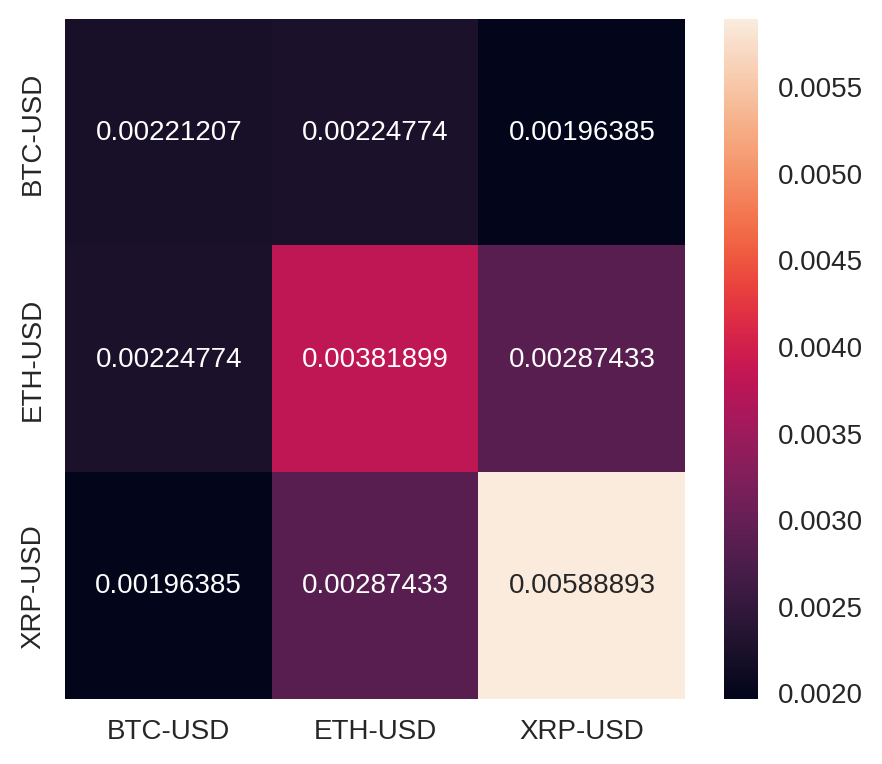

In [ ]:
# visualize crypto covariance
sns.heatmap(cryptocurrency_portfolio_cov_matrix, annot=True, fmt='g')
plt.show()

In [ ]:
df_cryptocurrency['Bitcoin'] = df_cryptocurrency['Bitcoin'].pct_change()
df_cryptocurrency['Ethereum'] = df_cryptocurrency['Ethereum'].pct_change()
df_cryptocurrency['Ripple'] = df_cryptocurrency['Ripple'].pct_change()

In [ ]:
df_cryptocurrency = df_cryptocurrency.fillna(0)
df_cryptocurrency = df_cryptocurrency.replace([np.inf, -np.inf], 0) 
# df_cryptocurrency = df_cryptocurrency.replace([np.inf, -np.inf], 0, inplace=True)

# 3. Combine porfolios

In [ ]:
# create high risk no crypto portfolio dataframe
high_risk_no_crypto = high_risk_portfolio_rets
high_risk_no_crypto

,Date,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
0,2018-01-02,0.000000,0.000000,0.000000
1,2018-01-03,0.020871,0.009581,0.004781
2,2018-01-04,0.006166,0.004952,-0.000159
3,2018-01-05,-0.009192,0.008622,-0.002856
4,2018-01-08,0.004720,0.000000,-0.000636
...,...,...,...,...
994,2021-12-23,0.014156,0.005158,-0.008677
995,2021-12-27,0.024122,0.004516,0.002424
996,2021-12-28,0.005425,-0.003269,-0.003963
997,2021-12-29,0.007634,-0.004510,-0.010924


In [ ]:
# calculating summary stats for high risk no crypto
dd = high_risk_no_crypto.describe().round(5)
five_percentile_hn = high_risk_no_crypto.quantile(0.05)
fifty_percentile_hn = high_risk_no_crypto.quantile(0.5)
ninety_five_percentile_hn = high_risk_no_crypto.quantile(0.95)

df_percentile_hn=pd.concat([dd.T, five_percentile_hn, fifty_percentile_hn, ninety_five_percentile_hn],axis=1)
df_percentile_hn.T

,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
count,999.000000,999.000000,999.000000
mean,-0.002880,0.000220,0.000290
std,0.110560,0.014660,0.009400
min,-3.059660,-0.124790,-0.066680
25%,-0.010820,-0.007120,-0.004860
50%,0.002220,0.001160,0.000250
75%,0.013770,0.007940,0.005370
max,0.376620,0.075140,0.075200
0.05,-0.040037,-0.021119,-0.013293
0.5,0.002225,0.001158,0.000253


In [ ]:
# create high risk with crypto portfolio dataframe
high_risk_w_crypto = high_risk_portfolio_rets
high_risk_w_crypto = high_risk_w_crypto.merge(df_cryptocurrency, on='Date', how='left')
high_risk_w_crypto

,Date,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
0,2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-03,0.020871,0.009581,0.004781,0.014611,0.088503,0.251711
2,2018-01-04,0.006166,0.004952,-0.000159,0.026196,0.018907,0.029388
3,2018-01-05,-0.009192,0.008622,-0.002856,0.117333,0.017125,-0.046274
4,2018-01-08,0.004720,0.000000,-0.000636,-0.129631,0.151155,-0.194345
...,...,...,...,...,...,...,...
994,2021-12-23,0.014156,0.005158,-0.008677,0.044337,0.031621,0.040417
995,2021-12-27,0.024122,0.004516,0.002424,-0.002838,-0.017154,-0.067555
996,2021-12-28,0.005425,-0.003269,-0.003963,-0.060259,-0.058613,-0.079060
997,2021-12-29,0.007634,-0.004510,-0.010924,-0.024042,-0.045348,-0.042494


In [ ]:
# calculating summary stats for high risk with crypto
cc = high_risk_w_crypto.describe().round(5)
five_percentile = high_risk_w_crypto.quantile(0.05)
fifty_percentile = high_risk_w_crypto.quantile(0.5)
ninety_five_percentile = high_risk_w_crypto.quantile(0.95)

df_percentile=pd.concat([cc.T, five_percentile, fifty_percentile, ninety_five_percentile],axis=1)
df_percentile.T

,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,-0.002880,0.000220,0.000290,0.002420,0.003410,0.001790
std,0.110560,0.014660,0.009400,0.047030,0.061800,0.076740
min,-3.059660,-0.124790,-0.066680,-0.371700,-0.423470,-0.423340
25%,-0.010820,-0.007120,-0.004860,-0.017520,-0.024420,-0.027230
50%,0.002220,0.001160,0.000250,0.001400,0.000840,-0.001300
75%,0.013770,0.007940,0.005370,0.023690,0.032380,0.026960
max,0.376620,0.075140,0.075200,0.225130,0.409910,0.871500
0.05,-0.040037,-0.021119,-0.013293,-0.067696,-0.091860,-0.105594
0.5,0.002225,0.001158,0.000253,0.001397,0.000842,-0.001300


In [ ]:
# create low risk no crypto portfolio dataframe
low_risk_no_crypto = low_risk_portfolio_rets
low_risk_no_crypto

,Date,Gold,German_Gov_Bond,MSCI_World
0,2018-01-02,0.000000,0.000000,0.000000
1,2018-01-03,0.001903,0.001828,0.007889
2,2018-01-04,0.002431,0.000334,0.004119
3,2018-01-05,0.000682,-0.000771,-0.000615
4,2018-01-08,-0.001288,0.001183,0.001642
...,...,...,...,...
995,2021-12-23,0.005329,-0.003582,0.006761
996,2021-12-27,-0.001712,-0.000097,0.000000
997,2021-12-28,0.001161,-0.000583,0.000000
998,2021-12-29,-0.002817,-0.004618,0.011148


In [ ]:
# calculating summary stats for low risk no crypto
bb = low_risk_no_crypto.describe().round(5)
five_percentile_ln = low_risk_no_crypto.quantile(0.05)
fifty_percentile_ln = low_risk_no_crypto.quantile(0.5)
ninety_five_percentile_ln = low_risk_no_crypto.quantile(0.95)

df_percentile_ln=pd.concat([bb.T, five_percentile_ln, fifty_percentile_ln, ninety_five_percentile_ln],axis=1)
df_percentile_ln.T

,Gold,German_Gov_Bond,MSCI_World
count,999.000000,999.000000,999.000000
mean,0.000370,0.000060,0.000540
std,0.009610,0.002490,0.011490
min,-0.049790,-0.020020,-0.097630
25%,-0.003650,-0.001180,-0.003520
50%,0.000510,0.000000,0.000790
75%,0.004890,0.001420,0.005090
max,0.059480,0.012140,0.088960
0.05,-0.015909,-0.003943,-0.015811
0.5,0.000511,0.000000,0.000793


In [ ]:
# create low risk with crypto portfolio dataframe
low_risk_w_crypto = low_risk_portfolio_rets
low_risk_w_crypto = low_risk_w_crypto.merge(df_cryptocurrency, on='Date', how='left')
low_risk_w_crypto

,Date,Gold,German_Gov_Bond,MSCI_World,Bitcoin,Ethereum,Ripple
0,2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-03,0.001903,0.001828,0.007889,0.014611,0.088503,0.251711
2,2018-01-04,0.002431,0.000334,0.004119,0.026196,0.018907,0.029388
3,2018-01-05,0.000682,-0.000771,-0.000615,0.117333,0.017125,-0.046274
4,2018-01-08,-0.001288,0.001183,0.001642,-0.129631,0.151155,-0.194345
...,...,...,...,...,...,...,...
994,2021-12-23,0.005329,-0.003582,0.006761,0.044337,0.031621,0.040417
995,2021-12-27,-0.001712,-0.000097,0.000000,-0.002838,-0.017154,-0.067555
996,2021-12-28,0.001161,-0.000583,0.000000,-0.060259,-0.058613,-0.079060
997,2021-12-29,-0.002817,-0.004618,0.011148,-0.024042,-0.045348,-0.042494


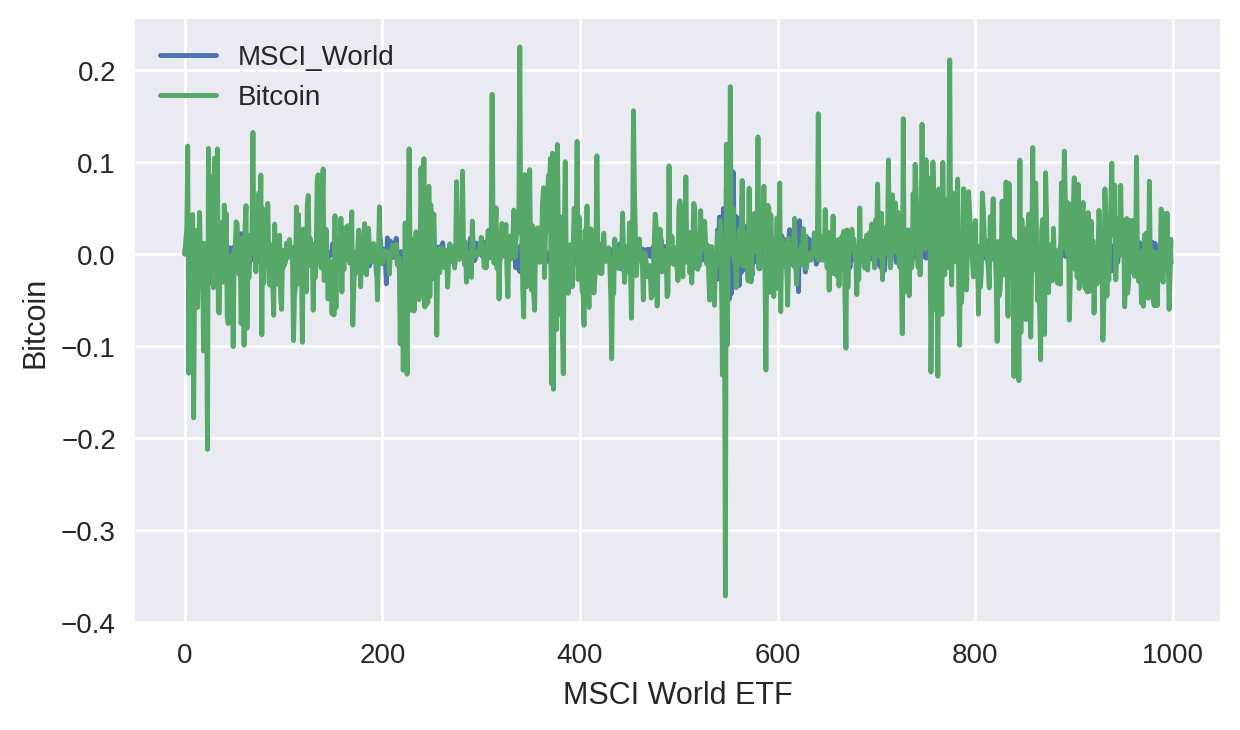

In [ ]:
#creating MSCI World vs Bitcoin plot
x = low_risk_w_crypto['MSCI_World']
y = low_risk_w_crypto['Bitcoin']
plt.figure(figsize=(7,4))
x.plot.line()
y.plot.line()
plt.legend(loc="upper left")
plt.xlabel("MSCI World ETF")
plt.ylabel("Bitcoin")
plt.show()

In [ ]:
# calculating summary stats for low risk with crypto
aa=low_risk_w_crypto.describe().round(5)
five_percentile_low = low_risk_w_crypto.quantile(0.05)
fifty_percentile_low = low_risk_w_crypto.quantile(0.5)
ninety_five_percentile_low = low_risk_w_crypto.quantile(0.95)

df_percentile_low=pd.concat([aa.T, five_percentile_low, fifty_percentile_low, ninety_five_percentile_low],axis=1)
df_percentile_low.T

,Gold,German_Gov_Bond,MSCI_World,Bitcoin,Ethereum,Ripple
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.000370,0.000060,0.000540,0.002420,0.003410,0.001790
std,0.009610,0.002490,0.011490,0.047030,0.061800,0.076740
min,-0.049790,-0.020020,-0.097630,-0.371700,-0.423470,-0.423340
25%,-0.003650,-0.001180,-0.003520,-0.017520,-0.024420,-0.027230
50%,0.000510,0.000000,0.000790,0.001400,0.000840,-0.001300
75%,0.004890,0.001420,0.005090,0.023690,0.032380,0.026960
max,0.059480,0.012140,0.088960,0.225130,0.409910,0.871500
0.05,-0.015909,-0.003943,-0.015811,-0.067696,-0.091860,-0.105594
0.5,0.000511,0.000000,0.000793,0.001397,0.000842,-0.001300


In [ ]:
# create high plus low risk portfolio 
total_no_crypto = low_risk_portfolio_rets.copy()
total_no_crypto = total_no_crypto.merge(high_risk_portfolio_rets, on='Date', how='left')
total_no_crypto 

,Date,Gold,German_Gov_Bond,MSCI_World,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
0,2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-03,0.001903,0.001828,0.007889,0.020871,0.009581,0.004781
2,2018-01-04,0.002431,0.000334,0.004119,0.006166,0.004952,-0.000159
3,2018-01-05,0.000682,-0.000771,-0.000615,-0.009192,0.008622,-0.002856
4,2018-01-08,-0.001288,0.001183,0.001642,0.004720,0.000000,-0.000636
...,...,...,...,...,...,...,...
994,2021-12-23,0.005329,-0.003582,0.006761,0.014156,0.005158,-0.008677
995,2021-12-27,-0.001712,-0.000097,0.000000,0.024122,0.004516,0.002424
996,2021-12-28,0.001161,-0.000583,0.000000,0.005425,-0.003269,-0.003963
997,2021-12-29,-0.002817,-0.004618,0.011148,0.007634,-0.004510,-0.010924


In [ ]:
# calculating summary stats for high plus low risk no crypto
ee = total_no_crypto.describe().round(5)
five_percentile_tnc = total_no_crypto.quantile(0.05)
fifty_percentile_tnc = total_no_crypto.quantile(0.5)
ninety_five_percentile_tnc = total_no_crypto.quantile(0.95)

df_percentile_tnc=pd.concat([ee.T, five_percentile_tnc, fifty_percentile_tnc, ninety_five_percentile_tnc],axis=1)
df_percentile_tnc.T

,Gold,German_Gov_Bond,MSCI_World,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.000370,0.000060,0.000540,-0.002880,0.000220,0.000290
std,0.009610,0.002490,0.011490,0.110560,0.014660,0.009400
min,-0.049790,-0.020020,-0.097630,-3.059660,-0.124790,-0.066680
25%,-0.003650,-0.001180,-0.003520,-0.010820,-0.007120,-0.004860
50%,0.000510,0.000000,0.000790,0.002220,0.001160,0.000250
75%,0.004890,0.001420,0.005090,0.013770,0.007940,0.005370
max,0.059480,0.012140,0.088960,0.376620,0.075140,0.075200
0.05,-0.015909,-0.003943,-0.015811,-0.040037,-0.021119,-0.013293
0.5,0.000511,0.000000,0.000793,0.002225,0.001158,0.000253


In [ ]:
# create high plus low risk plus crypto portfolio 
total_w_crypto = low_risk_portfolio_rets.copy()
total_w_crypto = total_w_crypto.merge(high_risk_portfolio_rets, on='Date', how='left')
total_w_crypto = total_w_crypto.merge(df_cryptocurrency, on='Date', how='left')
total_w_crypto

,Date,Gold,German_Gov_Bond,MSCI_World,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
0,2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-03,0.001903,0.001828,0.007889,0.020871,0.009581,0.004781,0.014611,0.088503,0.251711
2,2018-01-04,0.002431,0.000334,0.004119,0.006166,0.004952,-0.000159,0.026196,0.018907,0.029388
3,2018-01-05,0.000682,-0.000771,-0.000615,-0.009192,0.008622,-0.002856,0.117333,0.017125,-0.046274
4,2018-01-08,-0.001288,0.001183,0.001642,0.004720,0.000000,-0.000636,-0.129631,0.151155,-0.194345
...,...,...,...,...,...,...,...,...,...,...
994,2021-12-23,0.005329,-0.003582,0.006761,0.014156,0.005158,-0.008677,0.044337,0.031621,0.040417
995,2021-12-27,-0.001712,-0.000097,0.000000,0.024122,0.004516,0.002424,-0.002838,-0.017154,-0.067555
996,2021-12-28,0.001161,-0.000583,0.000000,0.005425,-0.003269,-0.003963,-0.060259,-0.058613,-0.079060
997,2021-12-29,-0.002817,-0.004618,0.011148,0.007634,-0.004510,-0.010924,-0.024042,-0.045348,-0.042494


In [ ]:
# calculating summary stats for high plus low risk plus crypto
ff = total_w_crypto.describe().round(5)

five_percentile_twc = total_no_crypto.quantile(0.05)
fifty_percentile_twc = total_no_crypto.quantile(0.5)
ninety_five_percentile_twc = total_no_crypto.quantile(0.95)

df_percentile_twc=pd.concat([ff.T, five_percentile_twc, fifty_percentile_twc, ninety_five_percentile_twc],axis=1)
df_percentile_twc.T

,Gold,German_Gov_Bond,MSCI_World,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.00000,999.00000
mean,0.000370,0.000060,0.000540,-0.002880,0.000220,0.000290,0.00242,0.00341,0.00179
std,0.009610,0.002490,0.011490,0.110560,0.014660,0.009400,0.04703,0.06180,0.07674
min,-0.049790,-0.020020,-0.097630,-3.059660,-0.124790,-0.066680,-0.37170,-0.42347,-0.42334
25%,-0.003650,-0.001180,-0.003520,-0.010820,-0.007120,-0.004860,-0.01752,-0.02442,-0.02723
50%,0.000510,0.000000,0.000790,0.002220,0.001160,0.000250,0.00140,0.00084,-0.00130
75%,0.004890,0.001420,0.005090,0.013770,0.007940,0.005370,0.02369,0.03238,0.02696
max,0.059480,0.012140,0.088960,0.376620,0.075140,0.075200,0.22513,0.40991,0.87150
0.05,-0.015909,-0.003943,-0.015811,-0.040037,-0.021119,-0.013293,NaN,NaN,NaN
0.5,0.000511,0.000000,0.000793,0.002225,0.001158,0.000253,NaN,NaN,NaN


### Creating line plot between MSCI World and Bitcoin Daily Performance

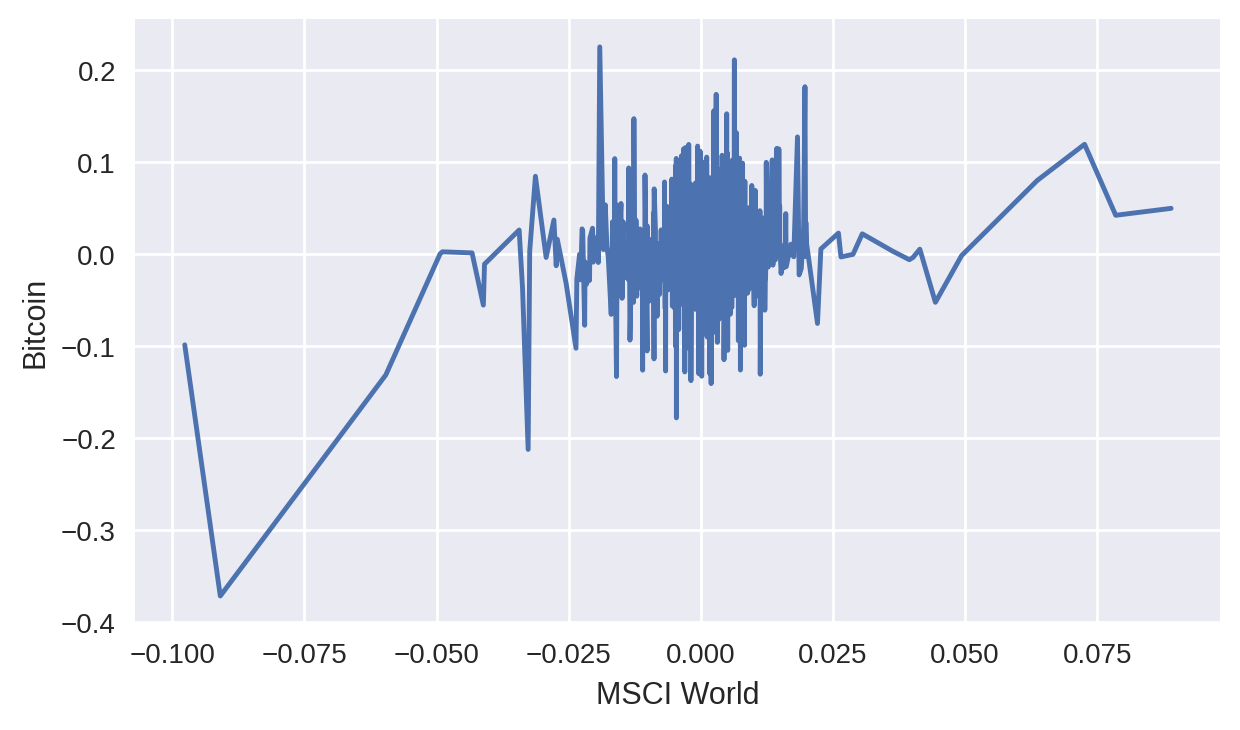

In [ ]:
#low_risk_w_crypto
plt.figure(figsize=(7,4))
sns.lineplot(data=low_risk_w_crypto, x="MSCI_World", y="Bitcoin")
plt.xlabel("MSCI World")
plt.show()

# 4. Calculating Correlation matrix for all the portfolios

## 4.1 High Risk No Crytpo Correlation Matrix

In [ ]:
hrnc_corr = high_risk_no_crypto.corr().round(5)
hrnc_corr

,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
Crude_Oil,1.00000,0.13678,-0.07946
Emerg_mk_ETF,0.13678,1.00000,-0.30624
Corporate_Bond,-0.07946,-0.30624,1.00000


In [ ]:
# pip uninstall matplotlib

In [ ]:
# pip install matplotlib==3.0.2

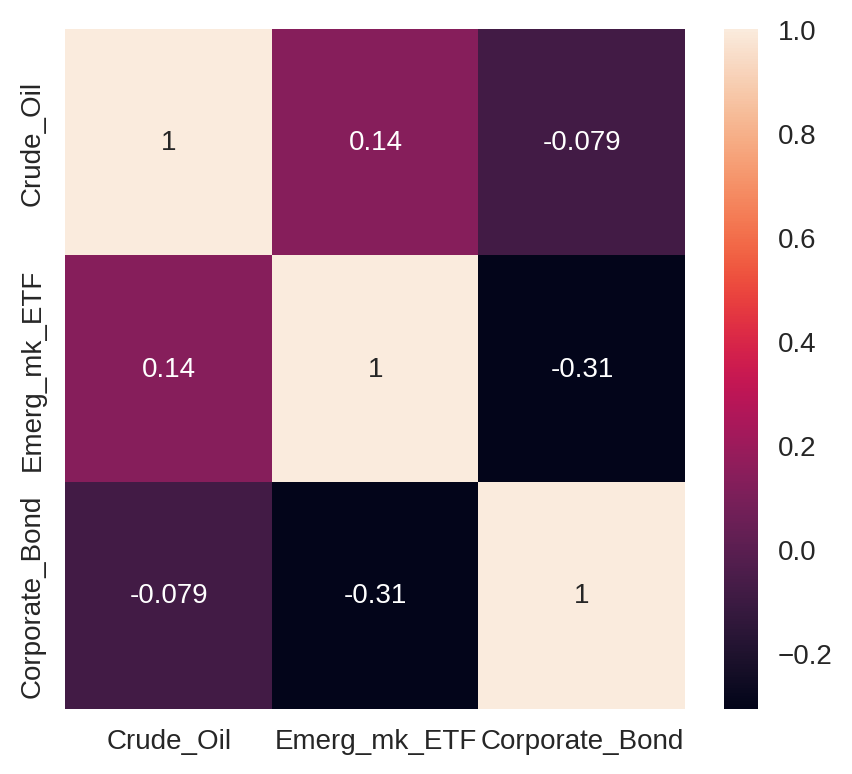

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(hrnc_corr, annot=True)
plt.show() 

## 4.2 High Risk With Crypto Correlation Matrix



In [ ]:
hrwc_corr = high_risk_w_crypto.corr().round(5)
hrwc_corr

,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
Crude_Oil,1.00000,0.13678,-0.07946,0.05374,0.03190,0.03018
Emerg_mk_ETF,0.13678,1.00000,-0.30624,0.20864,0.24389,0.20142
Corporate_Bond,-0.07946,-0.30624,1.00000,-0.05021,-0.05123,-0.03708
Bitcoin,0.05374,0.20864,-0.05021,1.00000,0.77334,0.54411
Ethereum,0.03190,0.24389,-0.05123,0.77334,1.00000,0.60610
Ripple,0.03018,0.20142,-0.03708,0.54411,0.60610,1.00000


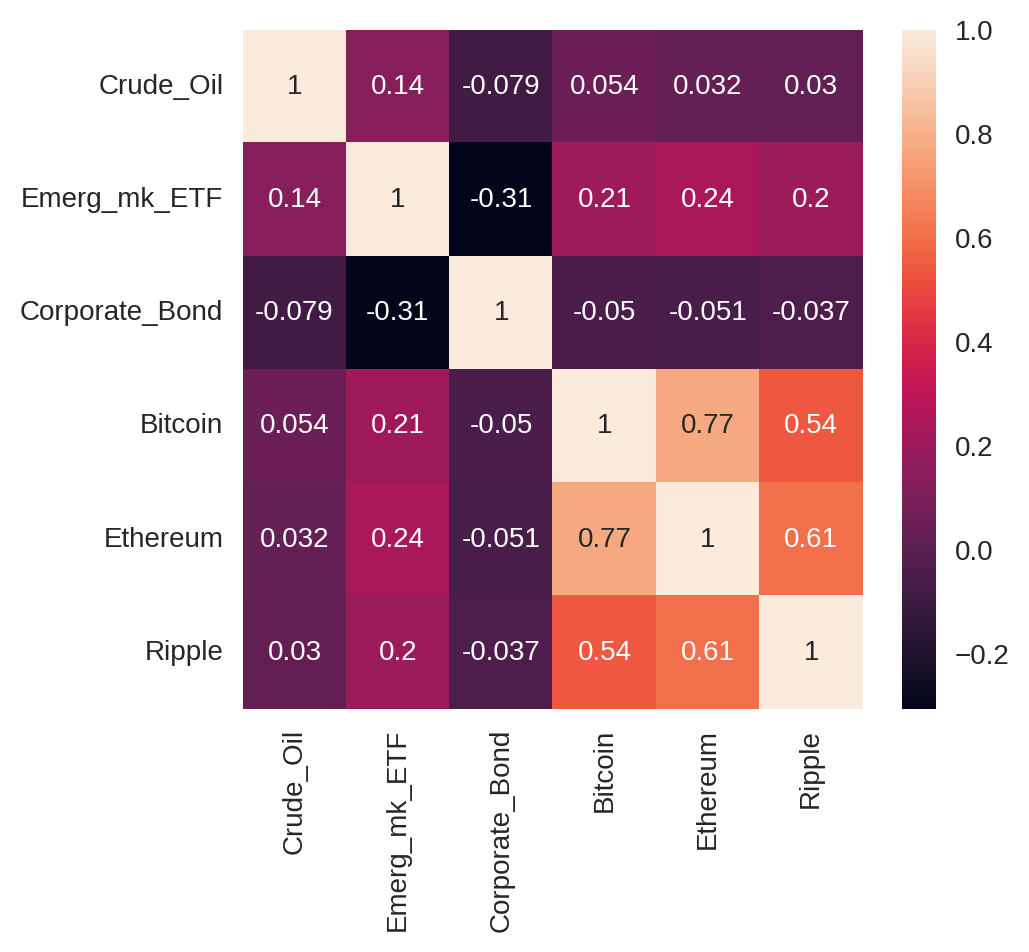

In [ ]:
sns.heatmap(hrwc_corr, annot=True)
plt.show() 

## 4.3 Low Risk No Crypto Correlation Matrix



In [ ]:
lrnc_corr = low_risk_no_crypto.corr().round(5)
lrnc_corr

,Gold,German_Gov_Bond,MSCI_World
Gold,1.00000,0.22915,0.06067
German_Gov_Bond,0.22915,1.00000,-0.15347
MSCI_World,0.06067,-0.15347,1.00000


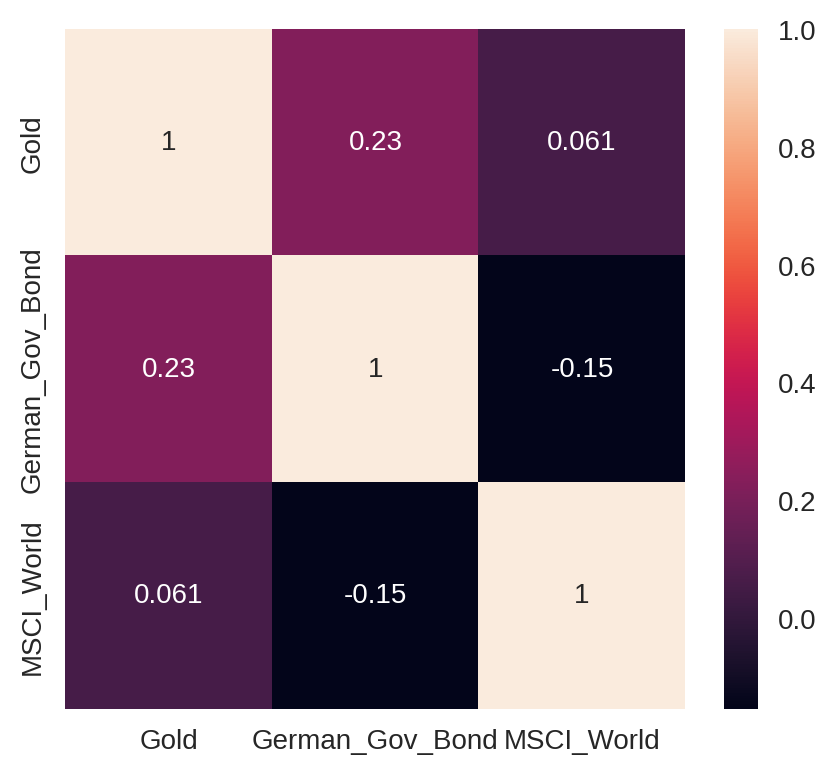

In [ ]:
sns.heatmap(lrnc_corr, annot=True)
plt.show() 

## 4.4 Low Risk With Crypto Correlation Matrix



In [ ]:
lrwc_corr = low_risk_w_crypto.corr().round(5)
lrwc_corr

,Gold,German_Gov_Bond,MSCI_World,Bitcoin,Ethereum,Ripple
Gold,1.00000,0.22915,0.06067,0.12513,0.11673,0.04078
German_Gov_Bond,0.22915,1.00000,-0.15347,-0.05233,-0.05640,-0.03869
MSCI_World,0.06067,-0.15347,1.00000,0.20234,0.20650,0.16698
Bitcoin,0.12513,-0.05233,0.20234,1.00000,0.77334,0.54411
Ethereum,0.11673,-0.05640,0.20650,0.77334,1.00000,0.60610
Ripple,0.04078,-0.03869,0.16698,0.54411,0.60610,1.00000


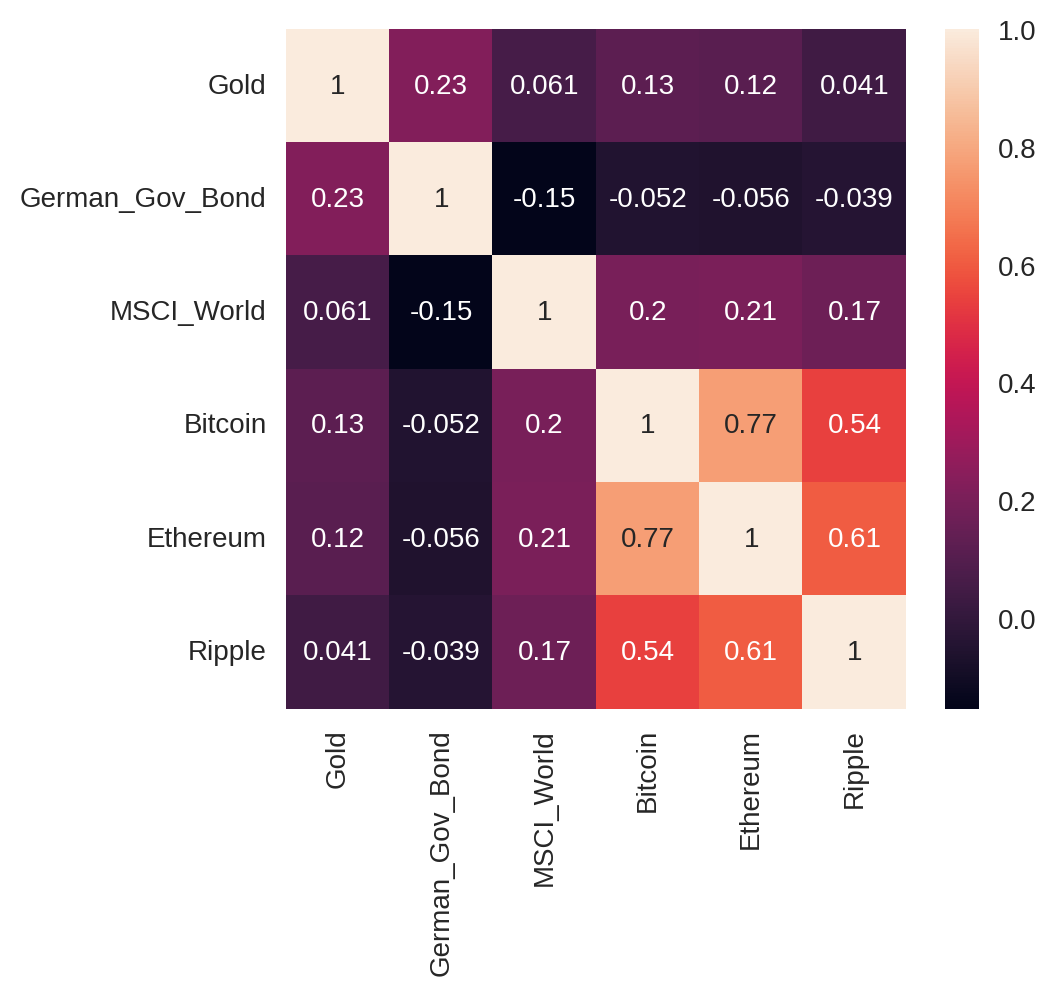

In [ ]:
sns.heatmap(lrwc_corr, annot=True)
plt.show() 

## 4.5 Low plus High risk portfolio without Crypto Correlation matrix

In [ ]:
#total_no_crypto 
tnc_corr = total_no_crypto.corr().round(5)
tnc_corr

,Gold,German_Gov_Bond,MSCI_World,Crude_Oil,Emerg_mk_ETF,Corporate_Bond
Gold,1.00000,0.22915,0.06067,0.02335,0.14764,0.20495
German_Gov_Bond,0.22915,1.00000,-0.15347,-0.01330,-0.15419,0.58375
MSCI_World,0.06067,-0.15347,1.00000,0.11328,0.71630,-0.35744
Crude_Oil,0.02335,-0.01330,0.11328,1.00000,0.13678,-0.07946
Emerg_mk_ETF,0.14764,-0.15419,0.71630,0.13678,1.00000,-0.30624
Corporate_Bond,0.20495,0.58375,-0.35744,-0.07946,-0.30624,1.00000


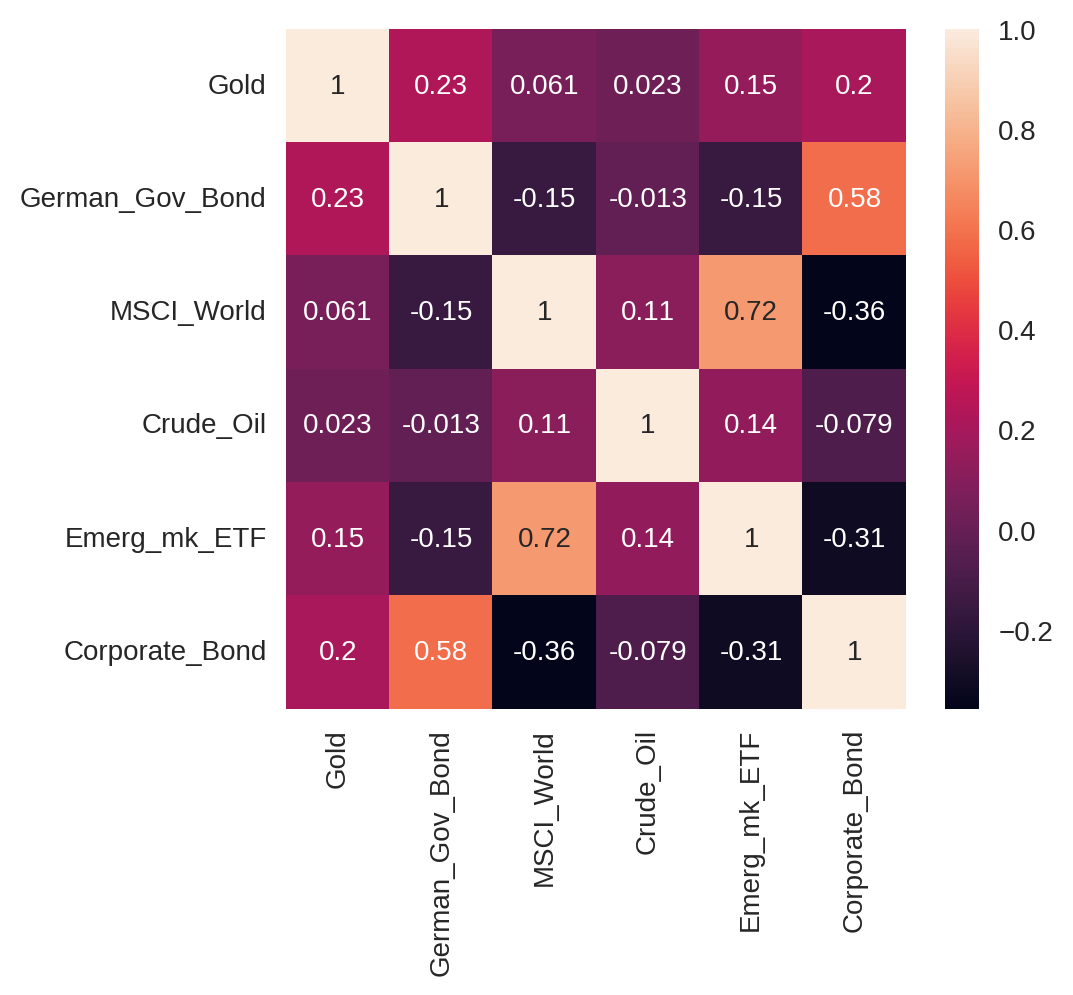

In [ ]:
sns.heatmap(tnc_corr, annot=True)
plt.show() 

## 4.6 Low plus High plus Crypto portfolio Correlation matrix

In [ ]:
twc_corr = total_w_crypto.corr().round(5)
twc_corr

,Gold,German_Gov_Bond,MSCI_World,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
Gold,1.00000,0.22915,0.06067,0.02335,0.14764,0.20495,0.12513,0.11673,0.04078
German_Gov_Bond,0.22915,1.00000,-0.15347,-0.01330,-0.15419,0.58375,-0.05233,-0.05640,-0.03869
MSCI_World,0.06067,-0.15347,1.00000,0.11328,0.71630,-0.35744,0.20234,0.20650,0.16698
Crude_Oil,0.02335,-0.01330,0.11328,1.00000,0.13678,-0.07946,0.05374,0.03190,0.03018
Emerg_mk_ETF,0.14764,-0.15419,0.71630,0.13678,1.00000,-0.30624,0.20864,0.24389,0.20142
Corporate_Bond,0.20495,0.58375,-0.35744,-0.07946,-0.30624,1.00000,-0.05021,-0.05123,-0.03708
Bitcoin,0.12513,-0.05233,0.20234,0.05374,0.20864,-0.05021,1.00000,0.77334,0.54411
Ethereum,0.11673,-0.05640,0.20650,0.03190,0.24389,-0.05123,0.77334,1.00000,0.60610
Ripple,0.04078,-0.03869,0.16698,0.03018,0.20142,-0.03708,0.54411,0.60610,1.00000


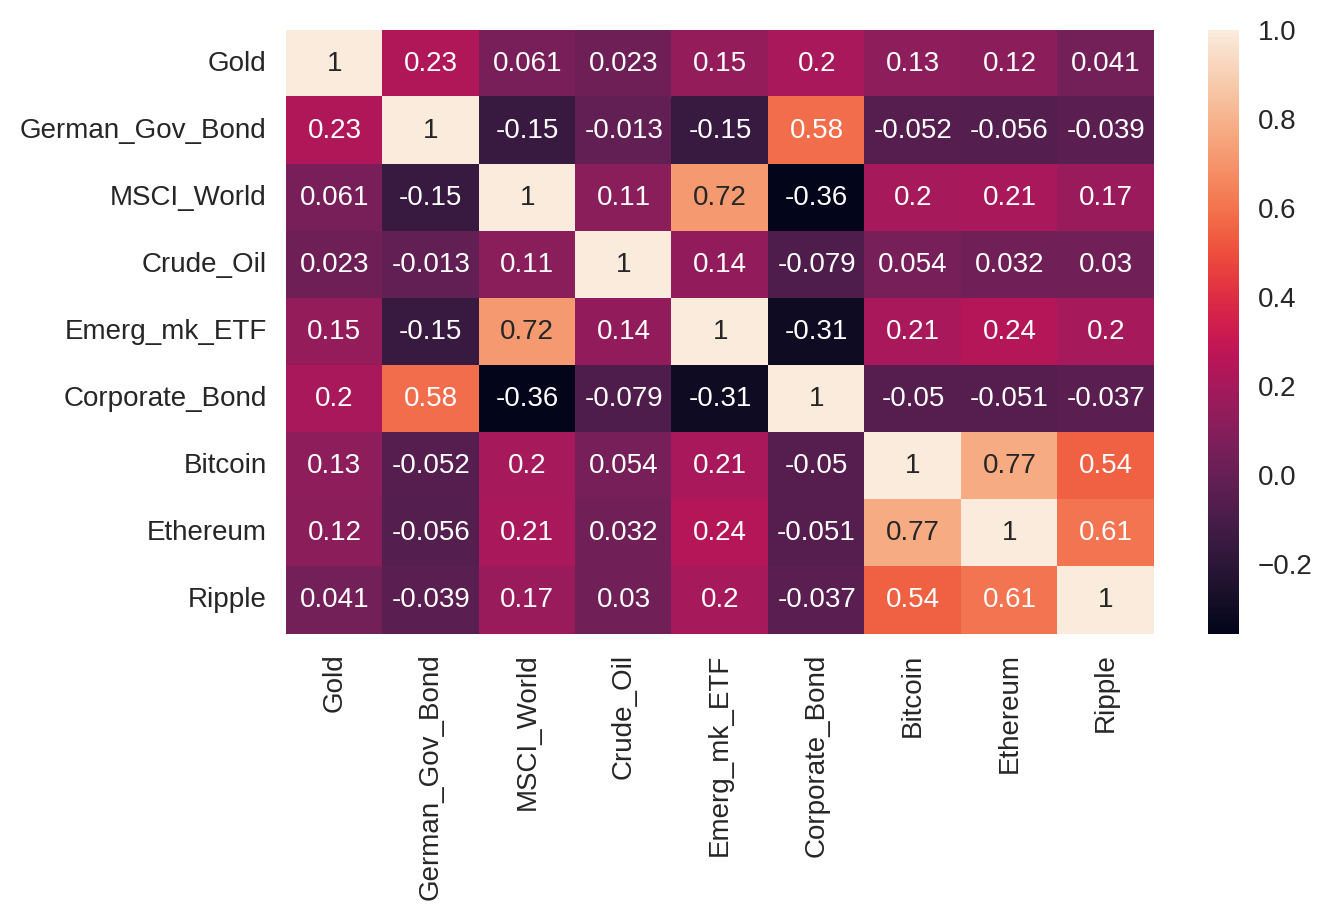

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(twc_corr, annot=True)
plt.show() 

In [ ]:
#pip install -U matplotlib

In [ ]:
# pip install matplotlib

In [ ]:
# Remove all the zero data points
list_ = [high_risk_no_crypto, high_risk_w_crypto, low_risk_no_crypto, low_risk_w_crypto]

for i in list_:
    for j in i[1:]:
        i[j] = i[j].replace(to_replace=0, method='ffill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 5. Analyzing cryptocurrency and porfolios diversification

## 5.1 Create indicators

In [ ]:
# create function to calculate sharpe ratio
def sharpe_ratio(df):
    #print("dataframe value", df)
    rfr = 0.014*5/len(df)
    std_df= df.std()
    #print("sum of df is", sum(df))
    #print("std deviation", std_df)
    mean_daily_return = sum(df)/len(df)
    #print("mean daily return is", mean_daily_return)
    #print(df.std())
    sharpe_ratio = (((mean_daily_return - rfr)/std_df))*(252**(1/2))
    #sharpe_ratio = (sr*len(df))/5
    return sharpe_ratio
    # print(f"Sharpe ration of {df} is {sharpe_ratio}")

In [ ]:
#create function to calculate sortino 
def sortino(df):
    rfr = 0.014
    N = 2
    return_mean = (df.mean()*N) - rfr
    return_std = df[df < 0].std()*np.sqrt(N)
    sortino_ratio = (return_mean)/return_std
    return sortino_ratio

https://learn.robinhood.com/articles/403DnmBe6ZeiQwhgDldXKn/what-is-the-sharpe-ratio/

Lo, Andrew W. "The statistics of Sharpe ratios." Financial analysts journal 58.4 (2002): 36-52.

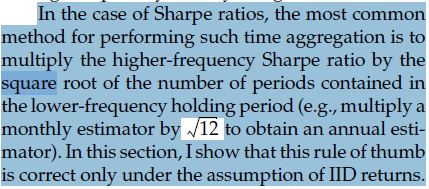


In [ ]:
# sharpe ratio // EDUARDO COMMENTS
def sharpe_ratio2(df, rfr=0.014, cap_per_year=252):                       #rfr will be a yearly rate
    rfr = rfr/cap_per_year                                     #Simple interest rate transformation for n capitalization per year
    mean_daily_return = sum(df)/len(df)
    std_df= df.std()
    daily_sharpe_ratio = (((mean_daily_return - rfr)/std_df))
    sharpe_ratio = daily_sharpe_ratio*(cap_per_year**(1/2))    #Annualized Sharpe Ratio
    return sharpe_ratio

In [ ]:
# sortino ratio // EDUARDO COMMENTS
def sortino2(df, rfr=0.014, cap_per_year=252):                            #rfr will be a yearly rate
    rfr = rfr/cap_per_year                                     #Simple interest rate transformation for n capitalization per year
    std_df= df[df < 0].std()
    mean_daily_return = sum(df)/len(df)
    daily_sortino_ratio = (((mean_daily_return - rfr)/std_df))
    sortino_ratio = daily_sortino_ratio*(cap_per_year**(1/2))    #Annualized Sortino Ratio
    return sortino_ratio

In [ ]:
# create function to calculate Omega
def Omega(df, threshold=0.07):
    
    df = pd.DataFrame(df)
    df = df.reset_index()
    df.columns = ['Date','Returns']

    dailyThreshold = (threshold+1)**np.sqrt(1/252) - 1
    df['excess'] = df['Returns'] - dailyThreshold
    dfPositiveSum = (df[df['excess'] > 0].sum())['excess']
    dfNegativeSum = (df[df['excess'] < 0].sum())['excess']
    
    omega = dfPositiveSum/(-dfNegativeSum)

    return omega
    

https://medium.com/@harishangaran/omega-performance-measure-using-python-a91752bea386

In [ ]:
# create function to calculate CVar_95
def CVaR_95(df):

    pm = df.mean()
    ps = df.std()

    # Compute the 95% VaR using the .ppf()
    VaR_95 = norm.ppf(0.95, loc = pm, scale = ps)
    # Compute the expected tail loss and the CVaR in the worst 5% of cases
    tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
    CVaR_95 = (1 / (1 - 0.95)) * tail_loss
    
    return CVaR_95



## 5.2 Create scenarios

In [ ]:
# create list of all portfolios dataframes
all_portfolios = [low_risk_no_crypto, low_risk_w_crypto, high_risk_no_crypto, high_risk_w_crypto, total_no_crypto, total_w_crypto]

### 5.2.1. Naive

In [ ]:
# calculate weight of each assets
def cal_naive_weight(df):
    asset_len = df.shape[1] - 1
    asset_weight = asset_len*[1/asset_len]
    return asset_weight

In [ ]:
# Calculate porfolio return 
def cal_naive_return(df):
    asset_weight = cal_naive_weight(df)
    pfl_return = pd.Series(np.dot(asset_weight, df.iloc[:,1:].T), index=df.index)
    # df['naive_return'] = pfl_return
    return pfl_return

### 5.2.2 Long Only

In [ ]:
# calculate mean return and covariance matrix for each scenario
lrnc_mean_rets = calc_mean_daily_returns(low_risk_no_crypto)
lrnc_cov_matrix = create_covariance_matrix(low_risk_no_crypto)

lrwc_mean_rets = calc_mean_daily_returns(low_risk_w_crypto)
lrwc_cov_matrix = create_covariance_matrix(low_risk_w_crypto)

hrnc_mean_rets = calc_mean_daily_returns(high_risk_no_crypto)
hrnc_cov_matrix = create_covariance_matrix(high_risk_no_crypto)

hrwc_mean_rets = calc_mean_daily_returns(high_risk_w_crypto)
hrwc_cov_matrix = create_covariance_matrix(high_risk_w_crypto)

tnc_mean_rets = calc_mean_daily_returns(total_no_crypto)
tnc_cov_matrix = create_covariance_matrix(total_no_crypto) 

twc_mean_rets = calc_mean_daily_returns(total_w_crypto)
twc_cov_matrix = create_covariance_matrix(total_w_crypto)

In [ ]:
longonly_lrnc = create_results_dataframe(low_risk_no_crypto, 10000, lrnc_mean_rets, lrnc_cov_matrix)
longonly_hrnc = create_results_dataframe(high_risk_no_crypto, 10000, hrnc_mean_rets, hrnc_cov_matrix)
longonly_lrwc = create_results_dataframe(low_risk_w_crypto, 10000, lrwc_mean_rets, lrwc_cov_matrix)
longonly_hrwc = create_results_dataframe(high_risk_w_crypto, 10000, hrwc_mean_rets, hrwc_cov_matrix)
longonly_tnc = create_results_dataframe(total_no_crypto, 10000, tnc_mean_rets, tnc_cov_matrix)
longonly_twc = create_results_dataframe(total_w_crypto, 10000, twc_mean_rets, twc_cov_matrix)

In [ ]:
# longonly_twc

### 5.2.3 Create the weights for each portfolio in long-only

In [ ]:
# find the best weight of assets in each scenario
weight_lrnc = longonly_lrnc.iloc[longonly_lrnc.iloc[:,2].idxmax(),:]
weight_lrwc = longonly_lrwc.iloc[longonly_lrwc.iloc[:,2].idxmax(),:]
weight_hrnc = longonly_hrnc.iloc[longonly_hrnc.iloc[:,2].idxmax(),:]
weight_hrwc = longonly_hrwc.iloc[longonly_hrwc.iloc[:,2].idxmax(),:]
weight_tnc = longonly_tnc.iloc[longonly_tnc.iloc[:,2].idxmax(),:]
weight_twc = longonly_twc.iloc[longonly_twc.iloc[:,2].idxmax(),:]

In [ ]:
weight_lrnc = weight_lrnc[3:].values
weight_lrwc = weight_lrwc[3:].values
weight_hrnc = weight_hrnc[3:].values
weight_hrwc = weight_hrwc[3:].values
weight_tnc = weight_tnc[3:].values
weight_twc = weight_twc[3:].values

In [ ]:
# calculate return in each scenarios using weights calculated from previous steps
longonly_lrnc_return = pd.Series(np.dot(weight_lrnc, low_risk_no_crypto.iloc[:,1:].T), index=low_risk_no_crypto.index)
longonly_lrwc_return = pd.Series(np.dot(weight_lrwc, low_risk_w_crypto.iloc[:,1:].T), index=low_risk_w_crypto.index)
longonly_hrnc_return = pd.Series(np.dot(weight_hrnc, high_risk_no_crypto.iloc[:,1:].T), index=high_risk_no_crypto.index)
longonly_hrwc_return = pd.Series(np.dot(weight_hrwc, high_risk_w_crypto.iloc[:,1:].T), index=high_risk_w_crypto.index)
longonly_tnc_return = pd.Series(np.dot(weight_tnc, total_no_crypto.iloc[:,1:].T), index=total_no_crypto.index)
longonly_twc_return = pd.Series(np.dot(weight_twc, total_w_crypto.iloc[:,1:].T), index=total_w_crypto.index)

### 5.2.4 Risk Parity

In [ ]:
import riskfolio as rp
# create function to calculate weights for risk parity scenario
def calc_risk_parity(portfolio_type):
    # Building the portfolio object
    port = rp.Portfolio(returns=portfolio_type.iloc[:,1:])

    # Calculating optimal portfolio

    # Select method and estimate input parameters:

    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    # Estimate optimal portfolio:

    model='Classic' # Could be Classic (historical) or FM (Factor Model)
    rm = 'MV' # Risk measure used, this time will be variance
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    b = None # Risk contribution constraints vector
    w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
    
    return w_rp
#display(w_rp.T)

In [ ]:
# create risk parity for high risk no crypto scenario
hrnc_rp = calc_risk_parity(high_risk_no_crypto)
w_rp_2 = pd.DataFrame(hrnc_rp)
w_rp_2 = w_rp_2.reset_index()
w_rp_2 = w_rp_2.iloc[:,1]
hrnc_rp_returns = pd.Series(np.dot(w_rp_2, high_risk_no_crypto.iloc[:,1:].T), 
                              index=high_risk_no_crypto.index)
sharpe_ratio(hrnc_rp_returns)

0.1594351715342283

In [ ]:
sharpe_ratio2(hrnc_rp_returns, 0.014, 252)

0.18819951425130832

In [ ]:
# create risk parity for high risk with crypto scenario
hrwc_rp = calc_risk_parity(high_risk_w_crypto)
w_rp_2 = pd.DataFrame(hrwc_rp)
w_rp_2 = w_rp_2.reset_index()
w_rp_2 = w_rp_2.iloc[:,1]
hrwc_rp_returns = pd.Series(np.dot(w_rp_2, high_risk_w_crypto.iloc[:,1:].T), 
                              index=high_risk_w_crypto.index)
sharpe_ratio(hrwc_rp_returns)

0.6091835980723876

In [ ]:
#calculating naive high risk with crypto stats summary
rp_hrwc_stats = pd.DataFrame(hrwc_rp_returns, columns= ["Risk Parity"])
ii = rp_hrwc_stats.describe().round(5)

five_percentile_rp = rp_hrwc_stats.quantile(0.05)
fifty_percentile_rp = rp_hrwc_stats.quantile(0.5)
ninety_five_percentile_rp = rp_hrwc_stats.quantile(0.95)

df_percentile_rp=pd.concat([ii.T, five_percentile_rp, fifty_percentile_rp, ninety_five_percentile_rp],axis=1)
df_percentile_rp.T


,Risk Parity
count,999.000000
mean,0.000470
std,0.010420
min,-0.113720
25%,-0.004410
50%,0.001030
75%,0.005690
max,0.049670
0.05,-0.014723
0.5,0.001034


In [ ]:
sharpe_ratio2(hrwc_rp_returns, 0.014, 252)

0.6312992129904568

In [ ]:
# create risk parity for low risk no crypto scenario
lrnc_rp = calc_risk_parity(low_risk_no_crypto)
w_rp_2 = pd.DataFrame(lrnc_rp)
w_rp_2 = w_rp_2.reset_index()
w_rp_2 = w_rp_2.iloc[:,1]
lrnc_rp_returns = pd.Series(np.dot(w_rp_2, low_risk_no_crypto.iloc[:,1:].T), 
                              index=low_risk_no_crypto.index)
sharpe_ratio(lrnc_rp_returns)

0.5713244724558788

In [ ]:
sharpe_ratio2(lrnc_rp_returns, 0.014, 252)

In [ ]:
# create risk parity for low risk with crypto scenario
lrwc_rp = calc_risk_parity(low_risk_w_crypto)
w_rp_2 = pd.DataFrame(lrwc_rp)
w_rp_2 = w_rp_2.reset_index()
w_rp_2 = w_rp_2.iloc[:,1]
lrwc_rp_returns = pd.Series(np.dot(w_rp_2, low_risk_w_crypto.iloc[:,1:].T), 
                              index=low_risk_w_crypto.index)
sharpe_ratio(lrwc_rp_returns)

0.8434581902391517

In [ ]:
sharpe_ratio2(lrwc_rp_returns, 0.014, 252)

0.8980717745681955

In [ ]:
# create risk parity for high plus low risk plus crypto scenario
twc_rp = calc_risk_parity(total_w_crypto)
w_rp_2 = pd.DataFrame(twc_rp)
w_rp_2 = w_rp_2.reset_index()
w_rp_2 = w_rp_2.iloc[:,1]
twc_rp_returns = pd.Series(np.dot(w_rp_2, total_w_crypto.iloc[:,1:].T), 
                              index=total_w_crypto.index)
sharpe_ratio(twc_rp_returns)

0.6893933469613506

In [ ]:
# create risk parity for high plus low risk no crypto scenario
tnc_rp = calc_risk_parity(total_no_crypto)
w_rp_2 = pd.DataFrame(tnc_rp)
w_rp_2 = w_rp_2.reset_index()
w_rp_2 = w_rp_2.iloc[:,1]
tnc_rp_returns = pd.Series(np.dot(w_rp_2, total_no_crypto.iloc[:,1:].T), 
                              index=total_no_crypto.index)
sharpe_ratio(tnc_rp_returns)

# 6. Create periods for each dataframe

In [ ]:
# create naive dataframe for each scenario
naive_lrnc = low_risk_no_crypto.copy()
naive_lrnc['naive_return'] = cal_naive_return(naive_lrnc)

naive_lrwc = low_risk_w_crypto.copy()
naive_lrwc['naive_return'] = cal_naive_return(naive_lrwc)

naive_hrnc = high_risk_no_crypto.copy()
naive_hrnc['naive_return'] = cal_naive_return(naive_hrnc)

naive_hrwc = high_risk_w_crypto.copy()
naive_hrwc['naive_return'] = cal_naive_return(naive_hrwc)

naive_tnc = total_no_crypto.copy()
naive_tnc['naive_return'] = cal_naive_return(naive_tnc)

naive_twc = total_w_crypto.copy()
naive_twc['naive_return'] = cal_naive_return(naive_twc)

In [ ]:
#calculating naive high risk with crypto stats summary
naive_hrwc_stats = naive_hrwc['naive_return']
naive_hrwc_stats = pd.DataFrame(naive_hrwc_stats)
hh = naive_hrwc_stats.describe()

five_percentile_naive = naive_hrwc_stats.quantile(0.05)
fifty_percentile_naive = naive_hrwc_stats.quantile(0.5)
ninety_five_percentile_naive = naive_hrwc_stats.quantile(0.95)

df_percentile_naive=pd.concat([hh.T, five_percentile_naive, fifty_percentile_naive, ninety_five_percentile_naive],axis=1)
df_percentile_naive.T

,naive_return
count,999.000000
mean,0.000900
std,0.033884
min,-0.520990
25%,-0.011038
50%,0.001483
75%,0.015725
max,0.178499
0.05,-0.045674
0.5,0.001483


In [ ]:
#calculating naive high risk with crypto stats summary
naive_hrnc_stats = naive_hrnc['naive_return']
naive_hrnc_stats = pd.DataFrame(naive_hrnc_stats)
hh = naive_hrnc_stats.describe()

five_percentile_naive = naive_hrnc_stats.quantile(0.05)
fifty_percentile_naive = naive_hrnc_stats.quantile(0.5)
ninety_five_percentile_naive = naive_hrnc_stats.quantile(0.95)

df_percentile_naive=pd.concat([hh.T, five_percentile_naive, fifty_percentile_naive, ninety_five_percentile_naive],axis=1)
df_percentile_naive.T

,naive_return
count,999.000000
mean,-0.000743
std,0.037601
min,-1.021434
25%,-0.004862
50%,0.001303
75%,0.006231
max,0.131233
0.05,-0.015987
0.5,0.001303


In [ ]:
#calculating naive high risk with crypto stats summary
naive_lrnc_stats = naive_lrnc['naive_return']
naive_lrnc_stats = pd.DataFrame(naive_lrnc_stats)
hh = naive_lrnc_stats.describe()

five_percentile_naive = naive_lrnc_stats.quantile(0.05)
fifty_percentile_naive = naive_lrnc_stats.quantile(0.5)
ninety_five_percentile_naive = naive_lrnc_stats.quantile(0.95)

df_percentile_naive=pd.concat([hh.T, five_percentile_naive, fifty_percentile_naive, ninety_five_percentile_naive],axis=1)
df_percentile_naive.T

,naive_return
count,999.000000
mean,0.000321
std,0.005263
min,-0.042113
25%,-0.001899
50%,0.000466
75%,0.002673
max,0.047611
0.05,-0.006486
0.5,0.000466


In [ ]:
#calculating naive high risk with crypto stats summary
naive_lrwc_stats = naive_lrwc['naive_return']
naive_lrwc_stats = pd.DataFrame(naive_lrwc_stats)
hh = naive_lrwc_stats.describe()

five_percentile_naive = naive_lrwc_stats.quantile(0.05)
fifty_percentile_naive = naive_lrwc_stats.quantile(0.5)
ninety_five_percentile_naive = naive_lrwc_stats.quantile(0.95)

df_percentile_naive=pd.concat([hh.T, five_percentile_naive, fifty_percentile_naive, ninety_five_percentile_naive],axis=1)
df_percentile_naive.T

,naive_return
count,999.000000
mean,0.001431
std,0.027600
min,-0.207631
25%,-0.010835
50%,0.001232
75%,0.014435
max,0.172484
0.05,-0.041364
0.5,0.001232


In [ ]:
#calculating naive high risk with crypto stats summary
naive_twc_stats = naive_twc['naive_return']
naive_twc_stats = pd.DataFrame(naive_twc_stats)
hh = naive_twc_stats.describe()

five_percentile_naive = naive_twc_stats.quantile(0.05)
fifty_percentile_naive = naive_twc_stats.quantile(0.5)
ninety_five_percentile_naive = naive_twc_stats.quantile(0.95)

df_percentile_naive=pd.concat([hh.T, five_percentile_naive, fifty_percentile_naive, ninety_five_percentile_naive],axis=1)
df_percentile_naive.T

,naive_return
count,999.000000
mean,0.000691
std,0.023108
min,-0.347727
25%,-0.007672
50%,0.001159
75%,0.010571
max,0.117174
0.05,-0.030274
0.5,0.001159


In [ ]:
#calculating naive high risk with crypto stats summary
naive_tnc_stats = naive_tnc['naive_return']
naive_tnc_stats = pd.DataFrame(naive_tnc_stats)
hh = naive_tnc_stats.describe()

five_percentile_naive = naive_tnc_stats.quantile(0.05)
fifty_percentile_naive = naive_tnc_stats.quantile(0.5)
ninety_five_percentile_naive = naive_tnc_stats.quantile(0.95)

df_percentile_naive=pd.concat([hh.T, five_percentile_naive, fifty_percentile_naive, ninety_five_percentile_naive],axis=1)
df_percentile_naive.T

,naive_return
count,999.000000
mean,-0.000234
std,0.019404
min,-0.511316
25%,-0.002757
50%,0.000818
75%,0.003848
max,0.073283
0.05,-0.009664
0.5,0.000818


In [ ]:
# create long only dataframe for each scenario
longonly_lrnc = low_risk_no_crypto.copy()
longonly_lrnc['longonly_return'] = cal_naive_return(longonly_lrnc)

longonly_lrwc = low_risk_w_crypto.copy()
longonly_lrwc['longonly_return'] = cal_naive_return(longonly_lrwc)

longonly_hrnc = high_risk_no_crypto.copy()
longonly_hrnc['longonly_return'] = cal_naive_return(longonly_hrnc)

longonly_hrwc = high_risk_w_crypto.copy()
longonly_hrwc['longonly_return'] = cal_naive_return(longonly_hrwc)

longonly_tnc = total_no_crypto.copy()
longonly_tnc['longonly_return'] = cal_naive_return(longonly_tnc)

longonly_twc = total_w_crypto.copy()
longonly_twc['longonly_return'] = cal_naive_return(longonly_twc)




In [ ]:
#calculating long only high risk with crypto stats summary
longonly_hrwc_stats = longonly_hrwc_return
longonly_hrwc_stats = pd.DataFrame(longonly_hrwc_stats, columns=['Long only high risk with crypto'])
gg = longonly_hrwc_stats.describe()
five_percentile_long = longonly_hrwc_stats.quantile(0.05)
fifty_percentile_long = longonly_hrwc_stats.quantile(0.5)
ninety_five_percentile_long = longonly_hrwc_stats.quantile(0.95)

df_percentile_long=pd.concat([gg.T, five_percentile_long, fifty_percentile_long, ninety_five_percentile_long],axis=1)
df_percentile_long.T

,Long only
count,999.000000
mean,0.001231
std,0.020006
min,-0.154263
25%,-0.007964
50%,0.000934
75%,0.011468
max,0.108913
0.05,-0.031772
0.5,0.000934


In [ ]:
#calculating long only high risk with crypto stats summary
longonly_hrnc_stats = longonly_hrnc_return
longonly_hrnc_stats = pd.DataFrame(longonly_hrnc_stats, columns=['Long only - high risk no crypto'])
gg = longonly_hrnc_stats.describe()
five_percentile_long = longonly_hrnc_stats.quantile(0.05)
fifty_percentile_long = longonly_hrnc_stats.quantile(0.5)
ninety_five_percentile_long = longonly_hrnc_stats.quantile(0.95)

df_percentile_long=pd.concat([gg.T, five_percentile_long, fifty_percentile_long, ninety_five_percentile_long],axis=1)
df_percentile_long.T

,Long only - high risk no crypto
count,999.000000
mean,0.000278
std,0.006798
min,-0.064689
25%,-0.003297
50%,0.000622
75%,0.004063
max,0.056538
0.05,-0.010146
0.5,0.000622


In [ ]:
#calculating long only high risk with crypto stats summary
longonly_lrnc_stats = longonly_lrnc_return
longonly_lrnc_stats = pd.DataFrame(longonly_lrnc_stats, columns=['Long only - low risk no crypto'])
gg = longonly_lrnc_stats.describe()
five_percentile_long = longonly_lrnc_stats.quantile(0.05)
fifty_percentile_long = longonly_lrnc_stats.quantile(0.5)
ninety_five_percentile_long = longonly_lrnc_stats.quantile(0.95)

df_percentile_long=pd.concat([gg.T, five_percentile_long, fifty_percentile_long, ninety_five_percentile_long],axis=1)
df_percentile_long.T

,Long only - low risk no crypto
count,999.000000
mean,0.000469
std,0.007935
min,-0.064938
25%,-0.002614
50%,0.000661
75%,0.003714
max,0.075760
0.05,-0.009504
0.5,0.000661


In [ ]:
#calculating long only high risk with crypto stats summary
longonly_lrwc_stats = longonly_lrwc_return
longonly_lrwc_stats = pd.DataFrame(longonly_lrwc_stats, columns=['Long only - low risk with crypto'])
gg = longonly_lrwc_stats.describe()
five_percentile_long = longonly_lrwc_stats.quantile(0.05)
fifty_percentile_long = longonly_lrwc_stats.quantile(0.5)
ninety_five_percentile_long = longonly_lrwc_stats.quantile(0.95)

df_percentile_long=pd.concat([gg.T, five_percentile_long, fifty_percentile_long, ninety_five_percentile_long],axis=1)
df_percentile_long.T

,Long only - low risk with crypto
count,999.000000
mean,0.000730
std,0.009985
min,-0.095101
25%,-0.003982
50%,0.000818
75%,0.005995
max,0.052709
0.05,-0.014349
0.5,0.000818


In [ ]:
longonly_twc_stats = longonly_twc_return
longonly_twc_stats = pd.DataFrame(longonly_twc_stats, columns=['Total with crypto'])
gg = longonly_twc_stats.describe()
five_percentile_long = longonly_twc_stats.quantile(0.05)
fifty_percentile_long = longonly_twc_stats.quantile(0.5)
ninety_five_percentile_long = longonly_twc_stats.quantile(0.95)

df_percentile_long=pd.concat([gg.T, five_percentile_long, fifty_percentile_long, ninety_five_percentile_long],axis=1)
df_percentile_long.T

,Total with crypto
count,999.000000
mean,0.000908
std,0.013513
min,-0.121176
25%,-0.005552
50%,0.001525
75%,0.006870
max,0.062198
0.05,-0.020101
0.5,0.001525


In [ ]:
longonly_tnc_stats = longonly_tnc_return
longonly_tnc_stats = pd.DataFrame(longonly_tnc_stats, columns=['Total no crypto'])
gg = longonly_tnc_stats.describe()
five_percentile_long = longonly_tnc_stats.quantile(0.05)
fifty_percentile_long = longonly_tnc_stats.quantile(0.5)
ninety_five_percentile_long = longonly_tnc_stats.quantile(0.95)

df_percentile_long=pd.concat([gg.T, five_percentile_long, fifty_percentile_long, ninety_five_percentile_long],axis=1)
df_percentile_long.T

,Total no crypto
count,999.000000
mean,0.000317
std,0.004731
min,-0.042889
25%,-0.001861
50%,0.000585
75%,0.002632
max,0.036420
0.05,-0.006417
0.5,0.000585


## 6.1 Print indicators

In [ ]:
sharpe_ratio(naive_twc['naive_return'])

0.4268571804172266

In [ ]:
# calculate sharpe ratio, sortino, omega, cvar_95 of each scenarios 

omega_thresh = 0.07

indicator_df = {
    'sharpe ratio' : [sharpe_ratio(naive_hrnc['naive_return']),sharpe_ratio(naive_hrwc['naive_return']), sharpe_ratio(naive_lrnc['naive_return']), sharpe_ratio(naive_lrwc['naive_return']), sharpe_ratio(naive_tnc['naive_return']), sharpe_ratio(naive_twc['naive_return']), 
                      sharpe_ratio(longonly_hrnc_return), sharpe_ratio(longonly_hrwc_return), sharpe_ratio(longonly_lrnc_return), sharpe_ratio(longonly_lrwc_return), sharpe_ratio(longonly_tnc_return), sharpe_ratio(longonly_twc_return),
                      sharpe_ratio(hrnc_rp_returns),sharpe_ratio(hrwc_rp_returns), sharpe_ratio(lrnc_rp_returns), sharpe_ratio(lrwc_rp_returns), sharpe_ratio(tnc_rp_returns), sharpe_ratio(twc_rp_returns)],
    # }

# sortino_df = {
    'sortino ratio' : [sortino(naive_hrnc['naive_return']),sortino(naive_hrwc['naive_return']), sortino(naive_lrnc['naive_return']), sortino(naive_lrwc['naive_return']), sortino(naive_tnc['naive_return']), sortino(naive_twc['naive_return']), 
                       sortino(longonly_hrnc_return), sortino(longonly_hrwc_return), sortino(longonly_lrnc_return), sortino(longonly_lrwc_return), sortino(longonly_tnc_return), sortino(longonly_twc_return),
                       sortino(hrnc_rp_returns),sortino(hrwc_rp_returns), sortino(lrnc_rp_returns), sortino(lrwc_rp_returns), sortino(tnc_rp_returns), sortino(twc_rp_returns)],
    # }

# omega_df = {
    'omega' : [Omega(naive_hrnc['naive_return']),Omega(naive_hrwc['naive_return']), Omega(naive_lrnc['naive_return']), Omega(naive_lrwc['naive_return']), Omega(naive_tnc['naive_return']), Omega(naive_twc['naive_return']),
               Omega(longonly_hrnc_return), Omega(longonly_hrwc_return), Omega(longonly_lrnc_return), Omega(longonly_lrwc_return), Omega(longonly_tnc_return), Omega(longonly_twc_return),
               Omega(hrnc_rp_returns),Omega(hrwc_rp_returns), Omega(lrnc_rp_returns), Omega(lrwc_rp_returns), Omega(tnc_rp_returns), Omega(twc_rp_returns)],
    # }

# CVaR_95_df = {
    'cvar_95' : [CVaR_95(naive_hrnc['naive_return']),CVaR_95(naive_hrwc['naive_return']), CVaR_95(naive_lrnc['naive_return']), CVaR_95(naive_lrwc['naive_return']), CVaR_95(naive_tnc['naive_return']), CVaR_95(naive_twc['naive_return']), 
                 CVaR_95(longonly_hrnc_return), CVaR_95(longonly_hrwc_return), CVaR_95(longonly_lrnc_return), CVaR_95(longonly_lrwc_return), CVaR_95(longonly_tnc_return), CVaR_95(longonly_twc_return),
                 CVaR_95(hrnc_rp_returns),CVaR_95(hrwc_rp_returns), CVaR_95(lrnc_rp_returns), CVaR_95(lrwc_rp_returns), CVaR_95(tnc_rp_returns), CVaR_95(twc_rp_returns)]
    }


In [ ]:
# summarize sharpe ratio of each scenarios
indicator_df = pd.DataFrame(data=indicator_df, index=['Naive - HRNC', 'Naive - HRWC', 'Naive - LRNC', 'Naive - LRWC', 'Naive - TNC', 'Naive - TWC',
                                                      'Longonly - HRNC','Longonly - HRWC','Longonly - LRNC', 'Longonly - LRWC', 'Longonly - TNC', 'Longonly - TWC', 
                                                      'RiskParity - HRNC', 'RiskParity - HRWC', 'RiskParity - LRNC', 'RiskParity - LRWC', 'RiskParity - TNC', 'RiskParity - TWC'])


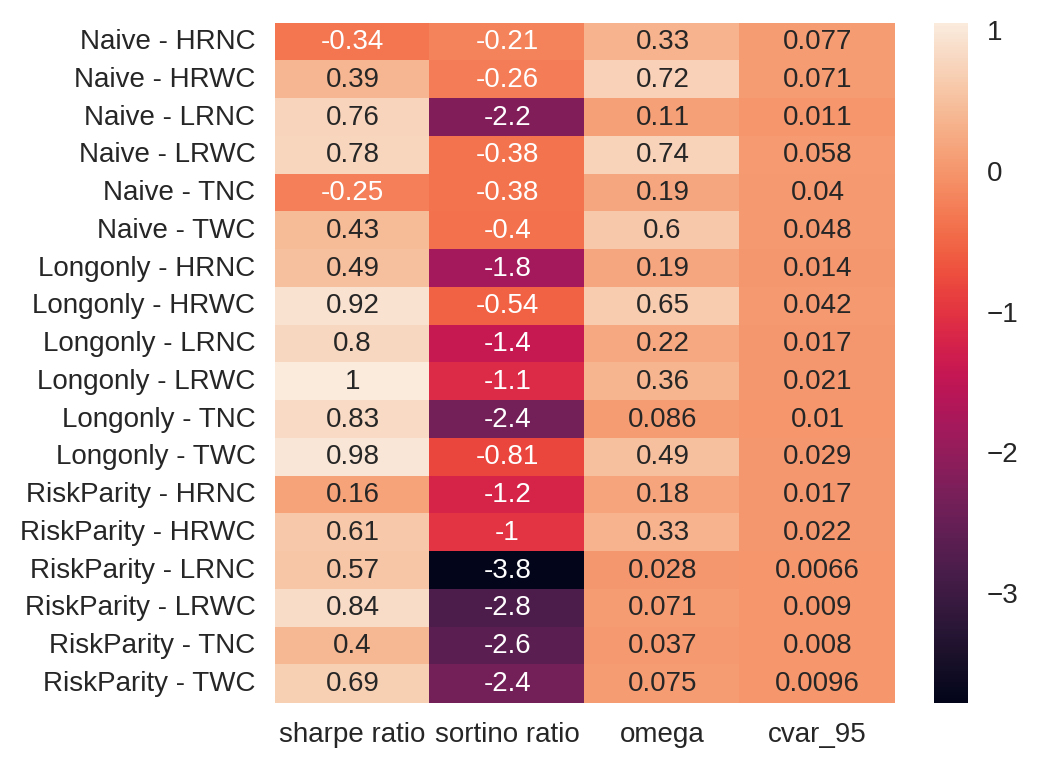

In [ ]:
sns.heatmap(indicator_df, annot=True)
plt.show() 

# 7. Extra

In [ ]:
longonly_lrnc = create_results_dataframe(low_risk_no_crypto, 10000, lrnc_mean_rets, lrnc_cov_matrix)
longonly_hrnc = create_results_dataframe(high_risk_no_crypto, 10000, hrnc_mean_rets, hrnc_cov_matrix)
longonly_lrwc = create_results_dataframe(low_risk_w_crypto, 10000, lrwc_mean_rets, lrwc_cov_matrix)
longonly_hrwc = create_results_dataframe(high_risk_w_crypto, 10000, hrwc_mean_rets, hrwc_cov_matrix)
longonly_tnc = create_results_dataframe(total_no_crypto, 10000, tnc_mean_rets, tnc_cov_matrix)
longonly_twc = create_results_dataframe(total_w_crypto, 10000, twc_mean_rets, twc_cov_matrix)

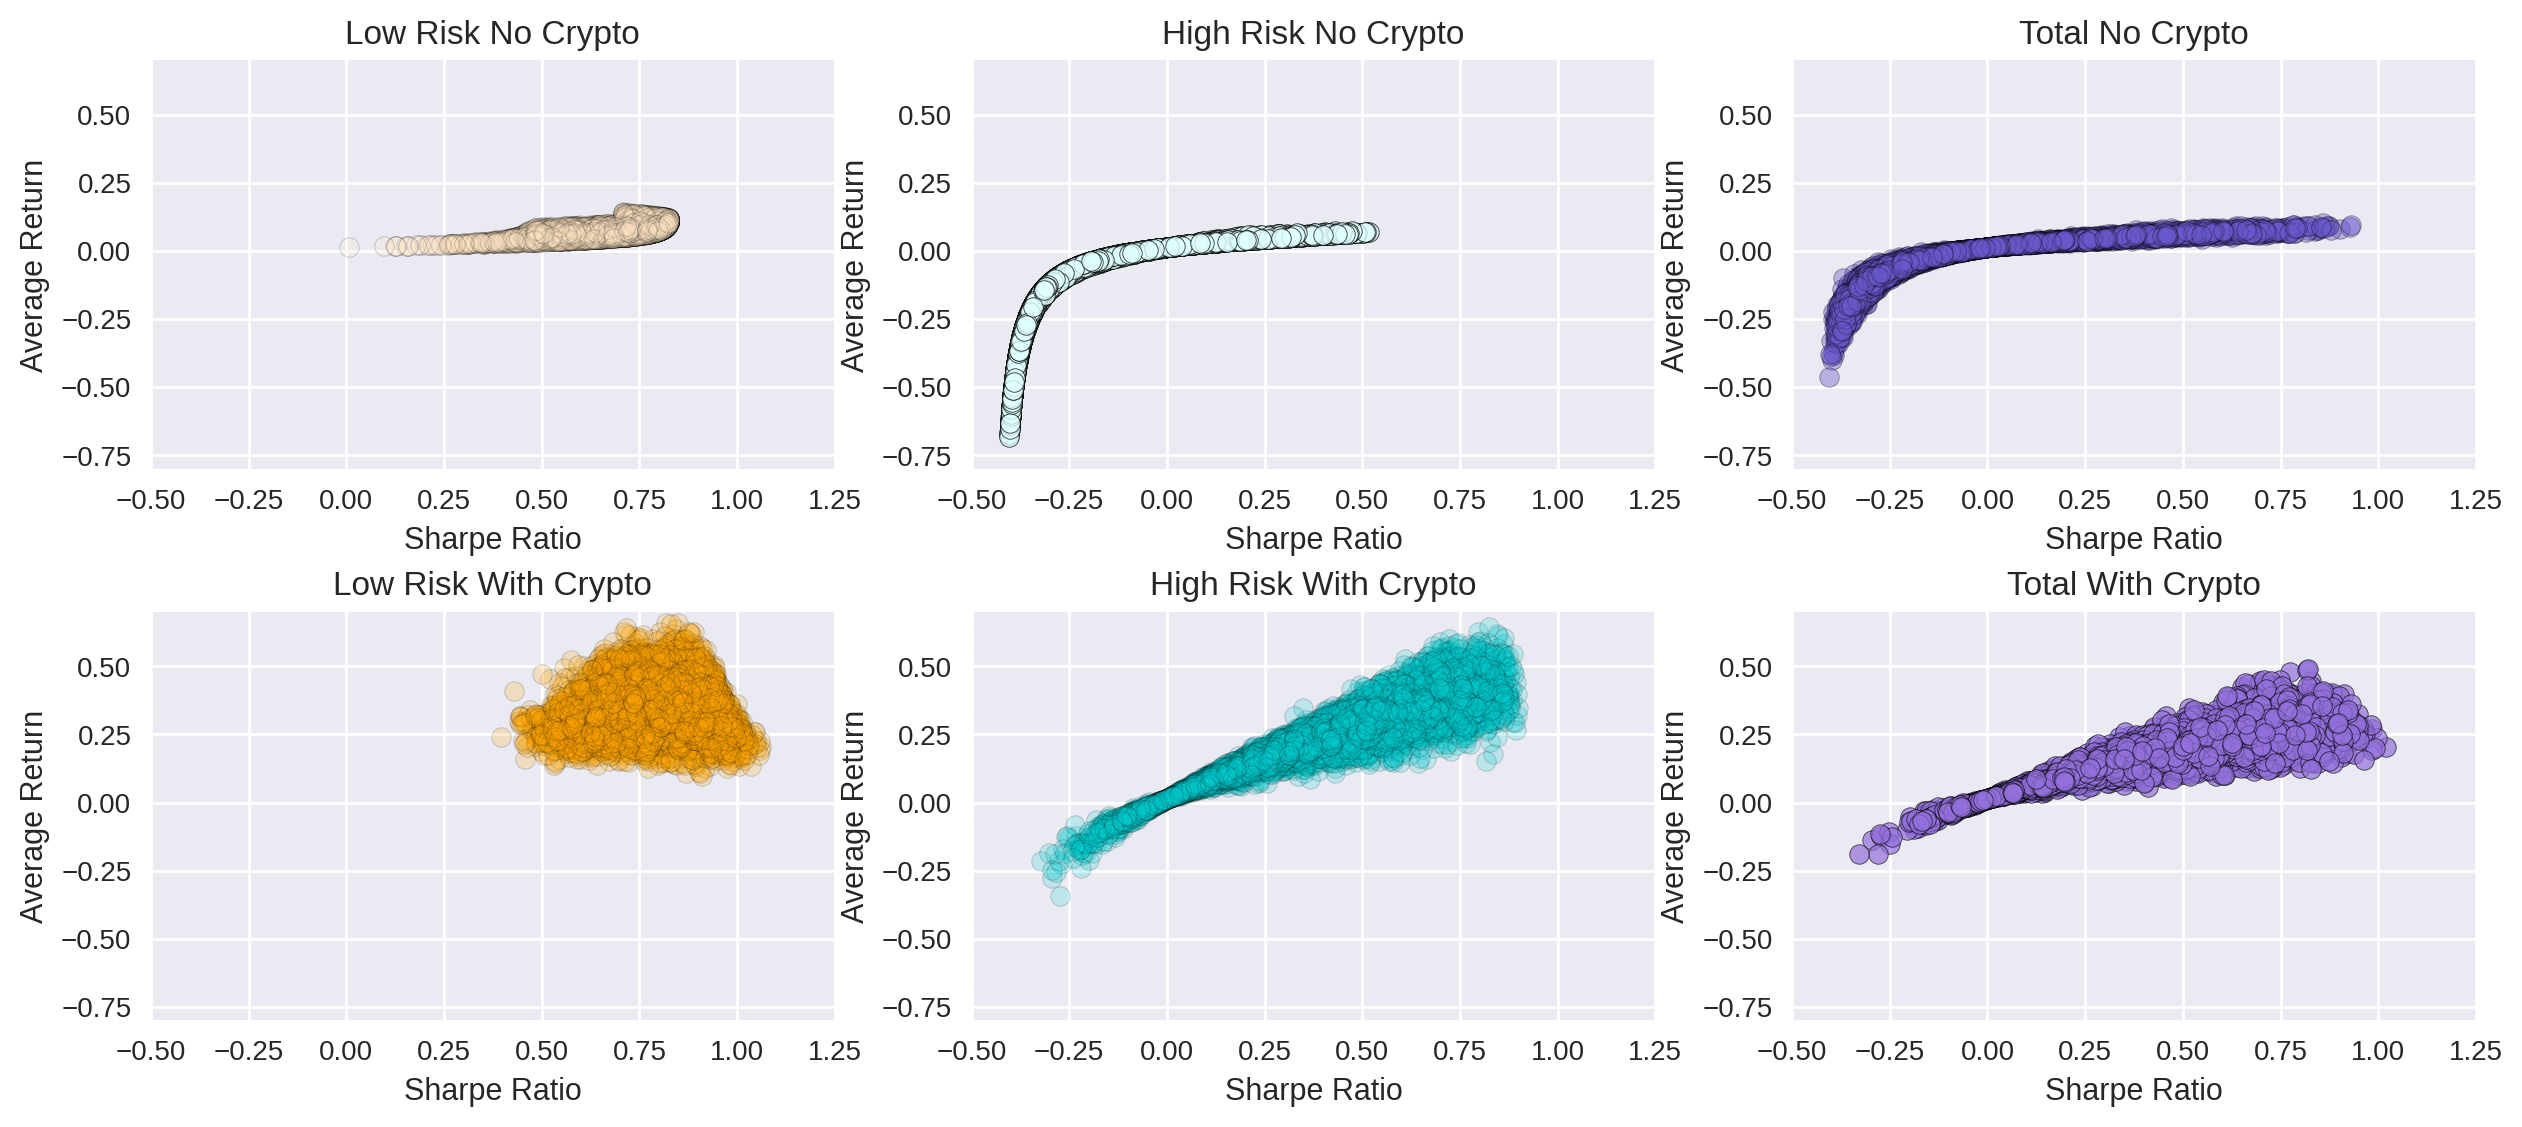

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Get the angles from 0 to 2 pie (360 degree) in narray object
X1 = longonly_lrnc.iloc[:,2]
X2 = longonly_lrwc.iloc[:,2]
X3 = longonly_hrnc.iloc[:,2]
X4 = longonly_hrwc.iloc[:,2]
X5 = longonly_tnc.iloc[:,2]
X6 = longonly_twc.iloc[:,2]

  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = longonly_lrnc.iloc[:,0]
Y2 = longonly_lrwc.iloc[:,0]
Y3 = longonly_hrnc.iloc[:,0]
Y4 = longonly_hrwc.iloc[:,0]
Y5 = longonly_tnc.iloc[:,0]
Y6 = longonly_twc.iloc[:,0]
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(figsize=(15,6), nrows=2, ncols=3)

for ax in axis.flat:
    ax.set(xlabel='Sharpe Ratio', ylabel='Average Return')

for (m,n), subplot in np.ndenumerate(axis):
    subplot.set_xlim(-0.5,1.25)
    subplot.set_ylim(-0.8,0.7)
  
axis[0, 0].scatter(X1, Y1, c='bisque', edgecolors='black', alpha=0.2)
axis[0, 0].set_title("Low Risk No Crypto")
  
axis[1, 0].scatter(X2, Y2, c='orange', edgecolors='black', alpha=0.2)
axis[1, 0].set_title("Low Risk With Crypto")
  
axis[0, 1].scatter(X3, Y3, c='lightcyan', edgecolors='black', alpha=0.8)
axis[0, 1].set_title("High Risk No Crypto")
  
axis[1, 1].scatter(X4, Y4, c='darkturquoise', edgecolors='black', alpha=0.2)
axis[1, 1].set_title("High Risk With Crypto")

axis[0, 2].scatter(X5, Y5, c='slateblue', edgecolors='black', alpha=0.4)
axis[0, 2].set_title("Total No Crypto")

axis[1, 2].scatter(X6, Y6, c='mediumpurple', edgecolors='black', alpha=0.7)
axis[1, 2].set_title("Total With Crypto")
  
# Combine all the operations and display
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

In [ ]:
sharpe_ratio(naive_hrnc['naive_return']), sharpe_ratio(naive_hrwc['naive_return']), sharpe_ratio(naive_lrnc['naive_return']), sharpe_ratio(naive_lrwc['naive_return']), sharpe_ratio(naive_tnc['naive_return']), sharpe_ratio(naive_twc['naive_return']), 
sharpe_ratio(longonly_hrnc_return), sharpe_ratio(longonly_hrwc_return), sharpe_ratio(longonly_lrnc_return), sharpe_ratio(longonly_lrwc_return), sharpe_ratio(longonly_tnc_return), sharpe_ratio(longonly_twc_return),
sharpe_ratio(hrnc_rp_returns),sharpe_ratio(hrwc_rp_returns), sharpe_ratio(lrnc_rp_returns), sharpe_ratio(lrwc_rp_returns), sharpe_ratio(tnc_rp_returns), sharpe_ratio(twc_rp_returns)

In [ ]:
naive_hrnc

In [ ]:
mu_sigma_df = {
    'mu' : [naive_hrnc['naive_return'].mean(),naive_hrwc['naive_return'].mean(), naive_lrnc['naive_return'].mean(), naive_lrwc['naive_return'].mean(), naive_tnc['naive_return'].mean(), naive_twc['naive_return'].mean(), 
           longonly_hrnc_return.mean(), longonly_hrwc_return.mean(), longonly_lrnc_return.mean(), longonly_lrwc_return.mean(), longonly_tnc_return.mean(), longonly_twc_return.mean(),
           hrnc_rp_returns.mean(), hrwc_rp_returns.mean(), lrnc_rp_returns.mean(), lrwc_rp_returns.mean(), tnc_rp_returns.mean(), twc_rp_returns.mean()],
    'std' : [naive_hrnc['naive_return'].std(),naive_hrwc['naive_return'].std(), naive_lrnc['naive_return'].std(), naive_lrwc['naive_return'].std(), naive_tnc['naive_return'].std(), naive_twc['naive_return'].std(), 
           longonly_hrnc_return.std(), longonly_hrwc_return.std(), longonly_lrnc_return.std(), longonly_lrwc_return.std(), longonly_tnc_return.std(), longonly_twc_return.std(),
           hrnc_rp_returns.std(), hrwc_rp_returns.std(), lrnc_rp_returns.std(), lrwc_rp_returns.std(), tnc_rp_returns.std(), twc_rp_returns.std()]                
}                

In [ ]:
mu_sigma_df = pd.DataFrame(data=mu_sigma_df, index=['Naive - HRNC', 'Naive - HRWC', 'Naive - LRNC', 'Naive - LRWC', 'Naive - TNC', 'Naive - TWC',
                                                      'Longonly - HRNC','Longonly - HRWC','Longonly - LRNC', 'Longonly - LRWC', 'Longonly - TNC', 'Longonly - TWC', 
                                                      'RiskParity - HRNC', 'RiskParity - HRWC', 'RiskParity - LRNC', 'RiskParity - LRWC', 'RiskParity - TNC', 'RiskParity - TWC'])


In [ ]:
mu_sigma_df = mu_sigma_df.reset_index()
mu_sigma_df

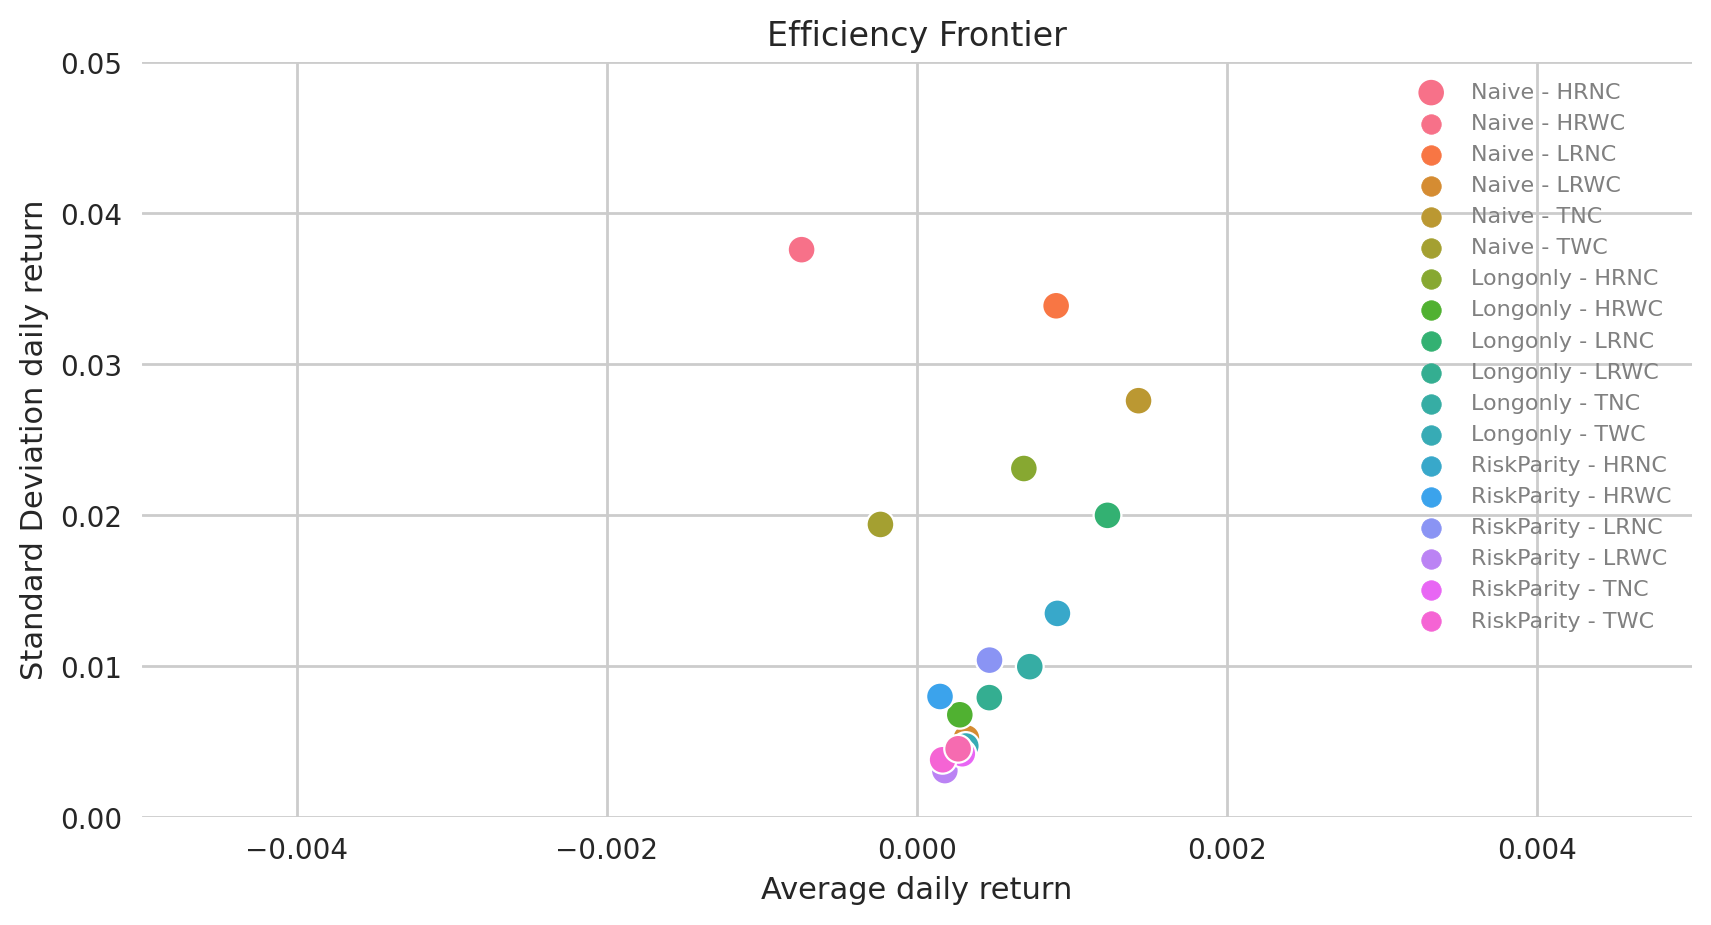

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.scatterplot(data=mu_sigma_df, x=mu_sigma_df.iloc[:,1], y=mu_sigma_df.iloc[:,2], hue=mu_sigma_df.iloc[:,0], s=100)
plt.xlabel('Average daily return')
plt.ylabel('Standard Deviation daily return')
plt.title('Efficiency Frontier')
plt.xlim(-0.005, 0.005)
plt.ylim(0, 0.05)
leg = plt.legend(mu_sigma_df.iloc[:,0], loc='best', prop={'size': 8})
for text in leg.get_texts():
  text.set_color("grey")


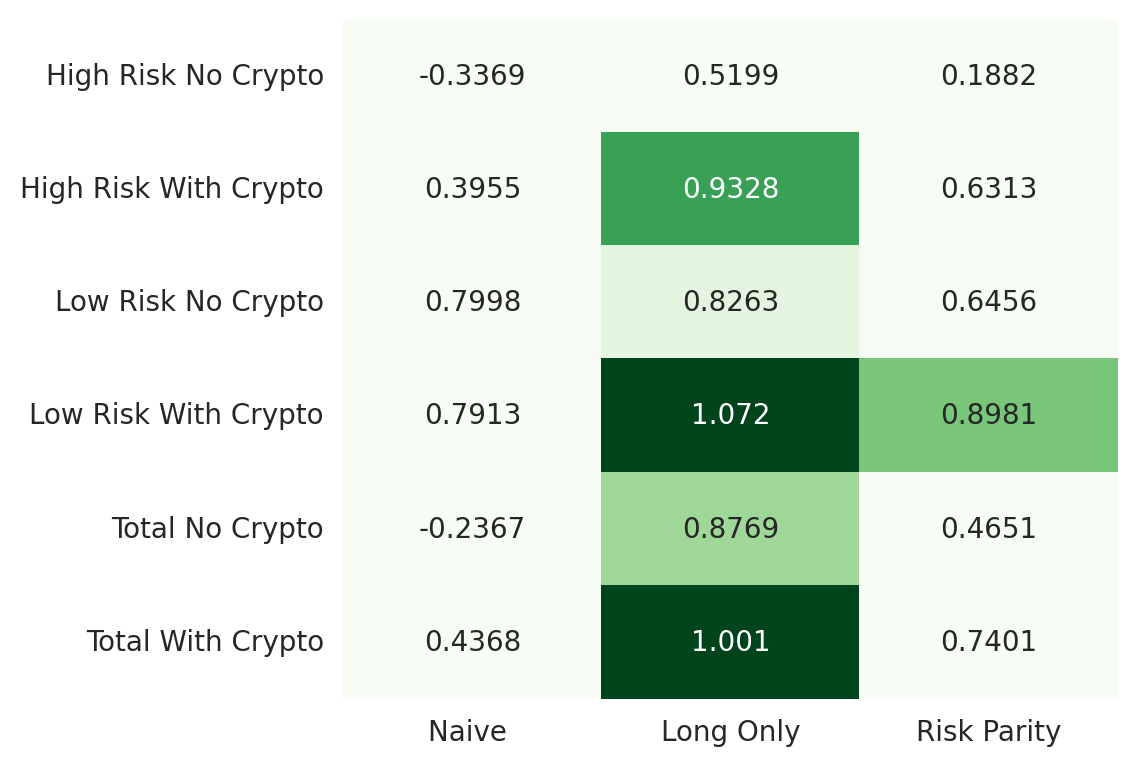

In [ ]:
sharpe_df = {
    'Naive ' :      [sharpe_ratio2(naive_hrnc['naive_return']),sharpe_ratio2(naive_hrwc['naive_return']), sharpe_ratio2(naive_lrnc['naive_return']), sharpe_ratio2(naive_lrwc['naive_return']), sharpe_ratio2(naive_tnc['naive_return']), sharpe_ratio2(naive_twc['naive_return'])], 
    'Long Only':    [sharpe_ratio2(longonly_hrnc_return), sharpe_ratio2(longonly_hrwc_return), sharpe_ratio2(longonly_lrnc_return), sharpe_ratio2(longonly_lrwc_return), sharpe_ratio2(longonly_tnc_return), sharpe_ratio2(longonly_twc_return)],
    'Risk Parity':  [sharpe_ratio2(hrnc_rp_returns),sharpe_ratio2(hrwc_rp_returns), sharpe_ratio2(lrnc_rp_returns), sharpe_ratio2(lrwc_rp_returns), sharpe_ratio2(tnc_rp_returns), sharpe_ratio2(twc_rp_returns)]
}

sharpe_df = pd.DataFrame(data=sharpe_df, index=['High Risk No Crypto','High Risk With Crypto','Low Risk No Crypto','Low Risk With Crypto','Total No Crypto','Total With Crypto'])
                         
colormap = sns.color_palette("Greens")
sns.heatmap(sharpe_df, annot=True, vmax=1.0, vmin=0.8, cmap='Greens', cbar=False, fmt='.4g')


plt.show() 

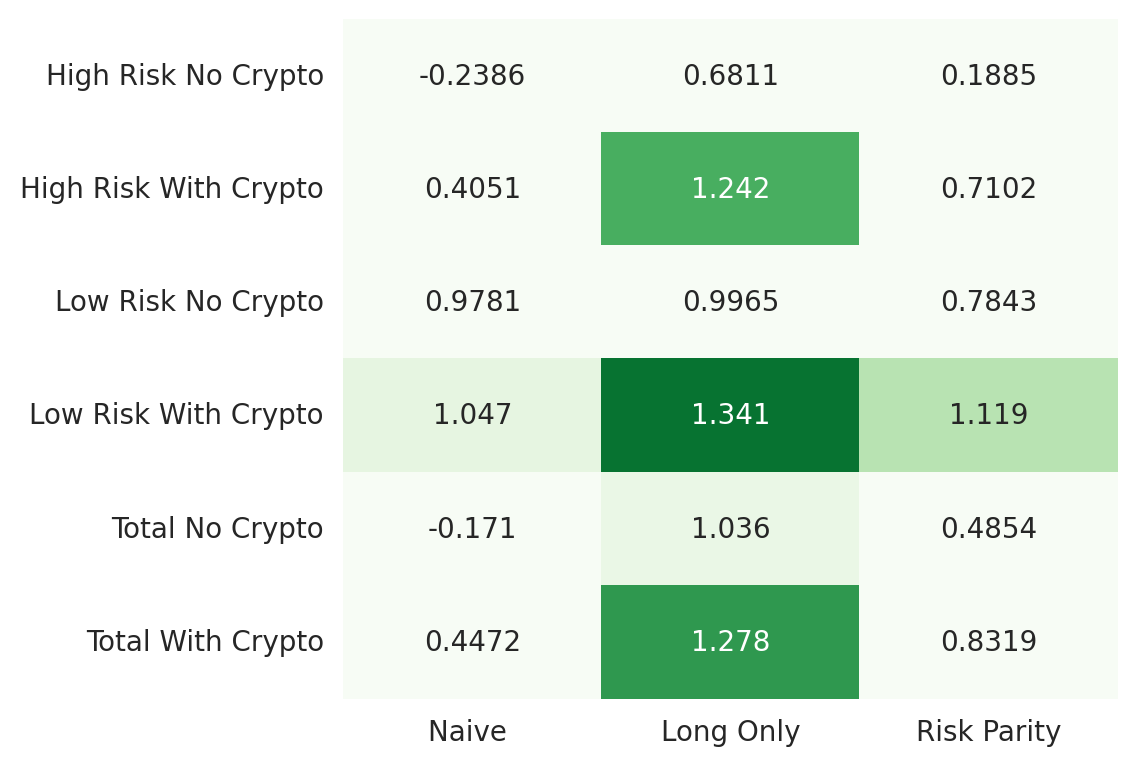

In [ ]:
sortino_df = {
    'Naive ' :      [sortino2(naive_hrnc['naive_return']),sortino2(naive_hrwc['naive_return']), sortino2(naive_lrnc['naive_return']), sortino2(naive_lrwc['naive_return']), sortino2(naive_tnc['naive_return']), sortino2(naive_twc['naive_return'])], 
    'Long Only':    [sortino2(longonly_hrnc_return), sortino2(longonly_hrwc_return), sortino2(longonly_lrnc_return), sortino2(longonly_lrwc_return), sortino2(longonly_tnc_return), sortino2(longonly_twc_return)],
    'Risk Parity':  [sortino2(hrnc_rp_returns),sortino2(hrwc_rp_returns), sortino2(lrnc_rp_returns), sortino2(lrwc_rp_returns), sortino2(tnc_rp_returns), sortino2(twc_rp_returns)]
}

sortino_df = pd.DataFrame(data=sortino_df, index=['High Risk No Crypto','High Risk With Crypto','Low Risk No Crypto','Low Risk With Crypto','Total No Crypto','Total With Crypto'])
                         
colormap = sns.color_palette("Greens")
sns.heatmap(sortino_df, annot=True, vmax=1.4, vmin=1, cmap='Greens', cbar=False, fmt='.4g')


plt.show() 

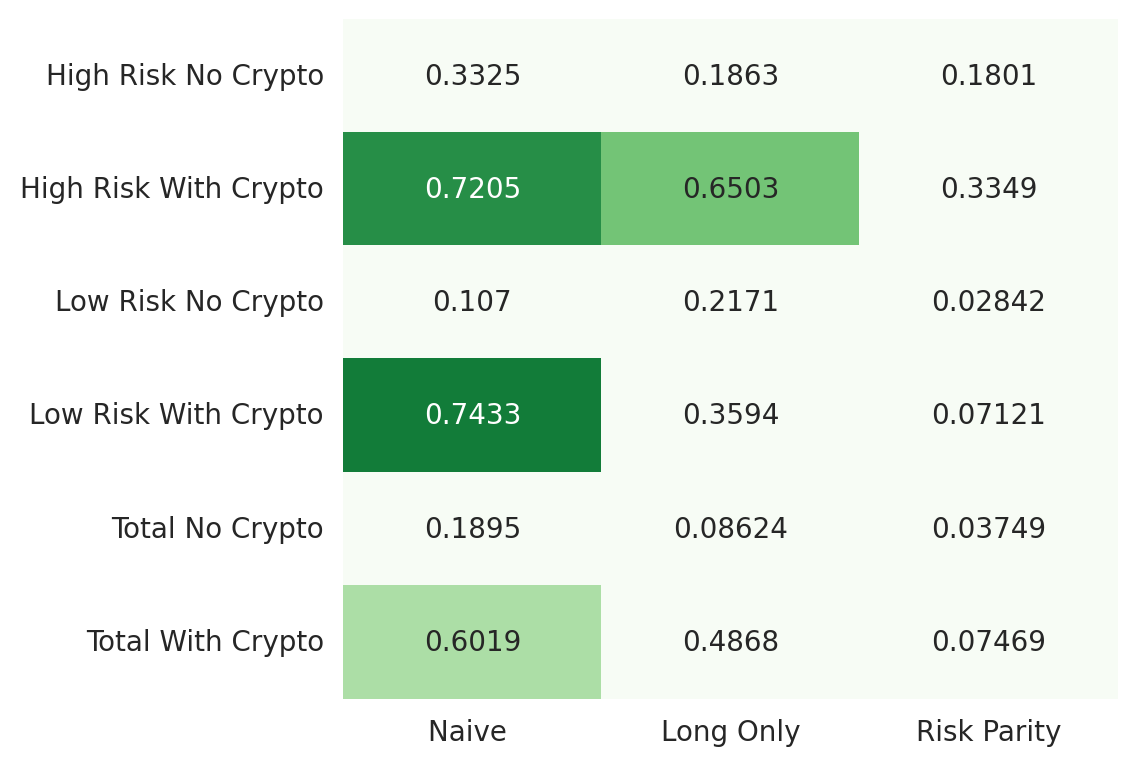

In [ ]:
Omega_df = {
    'Naive ' :      [Omega(naive_hrnc['naive_return']),Omega(naive_hrwc['naive_return']), Omega(naive_lrnc['naive_return']), Omega(naive_lrwc['naive_return']), Omega(naive_tnc['naive_return']), Omega(naive_twc['naive_return'])], 
    'Long Only':    [Omega(longonly_hrnc_return), Omega(longonly_hrwc_return), Omega(longonly_lrnc_return), Omega(longonly_lrwc_return), Omega(longonly_tnc_return), Omega(longonly_twc_return)],
    'Risk Parity':  [Omega(hrnc_rp_returns),Omega(hrwc_rp_returns), Omega(lrnc_rp_returns), Omega(lrwc_rp_returns), Omega(tnc_rp_returns), Omega(twc_rp_returns)]
}

Omega_df = pd.DataFrame(data=Omega_df, index=['High Risk No Crypto','High Risk With Crypto','Low Risk No Crypto','Low Risk With Crypto','Total No Crypto','Total With Crypto'])
                         
colormap = sns.color_palette("Greens")
sns.heatmap(Omega_df, annot=True, vmax=0.8, vmin=0.5, cmap='Greens', cbar=False, fmt='.4g')


plt.show() 

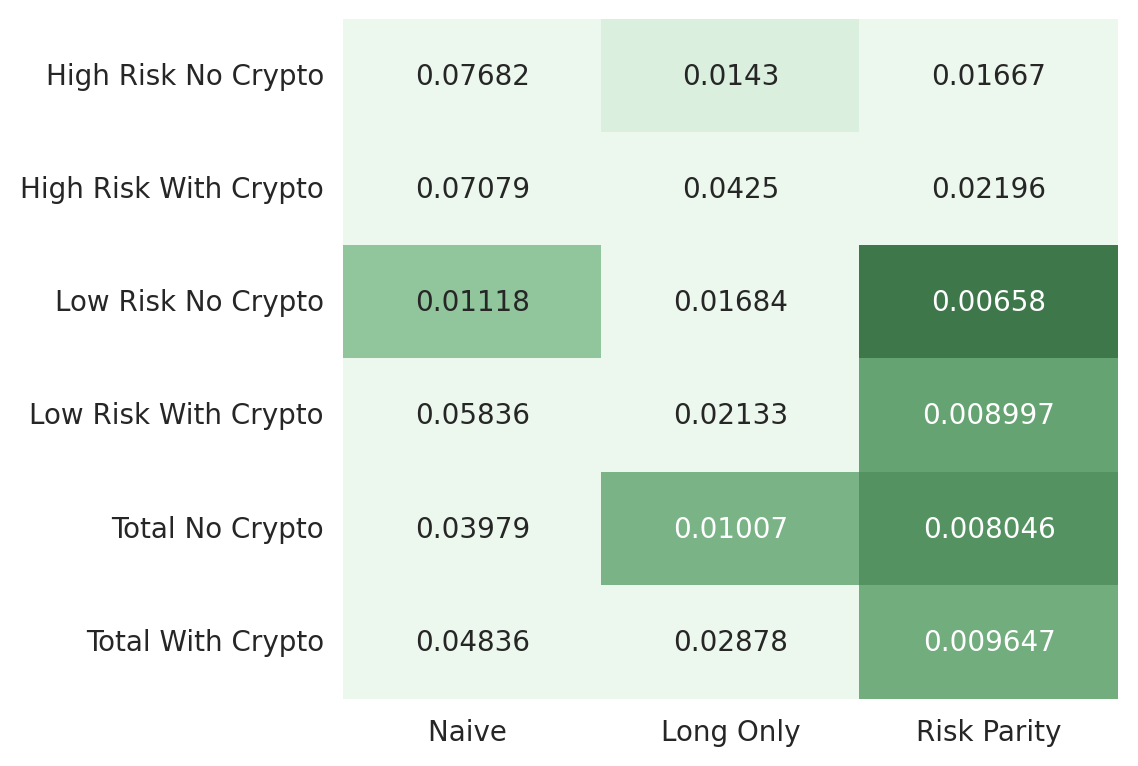

In [ ]:
CVaR_95_df = {
    'Naive ' :      [CVaR_95(naive_hrnc['naive_return']),CVaR_95(naive_hrwc['naive_return']), CVaR_95(naive_lrnc['naive_return']), CVaR_95(naive_lrwc['naive_return']), CVaR_95(naive_tnc['naive_return']), CVaR_95(naive_twc['naive_return'])], 
    'Long Only':    [CVaR_95(longonly_hrnc_return), CVaR_95(longonly_hrwc_return), CVaR_95(longonly_lrnc_return), CVaR_95(longonly_lrwc_return), CVaR_95(longonly_tnc_return), CVaR_95(longonly_twc_return)],
    'Risk Parity':  [CVaR_95(hrnc_rp_returns),CVaR_95(hrwc_rp_returns), CVaR_95(lrnc_rp_returns), CVaR_95(lrwc_rp_returns), CVaR_95(tnc_rp_returns), CVaR_95(twc_rp_returns)]
}

CVaR_95_df = pd.DataFrame(data=CVaR_95_df, index=['High Risk No Crypto','High Risk With Crypto','Low Risk No Crypto','Low Risk With Crypto','Total No Crypto','Total With Crypto'])
                         
colormap = sns.color_palette("Greens")
colors = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(CVaR_95_df, annot=True, vmax=0.015, vmin=0.001, cmap=colors, cbar=False, fmt='.4g')


plt.show()  

In [ ]:
high_risk_w_crypto

,Date,Crude_Oil,Emerg_mk_ETF,Corporate_Bond,Bitcoin,Ethereum,Ripple
0,2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-03,0.020871,0.009581,0.004781,0.014611,0.088503,0.251711
2,2018-01-04,0.006166,0.004952,-0.000159,0.026196,0.018907,0.029388
3,2018-01-05,-0.009192,0.008622,-0.002856,0.117333,0.017125,-0.046274
4,2018-01-08,0.004720,0.008622,-0.000636,-0.129631,0.151155,-0.194345
...,...,...,...,...,...,...,...
994,2021-12-23,0.014156,0.005158,-0.008677,0.044337,0.031621,0.040417
995,2021-12-27,0.024122,0.004516,0.002424,-0.002838,-0.017154,-0.067555
996,2021-12-28,0.005425,-0.003269,-0.003963,-0.060259,-0.058613,-0.079060
997,2021-12-29,0.007634,-0.004510,-0.010924,-0.024042,-0.045348,-0.042494


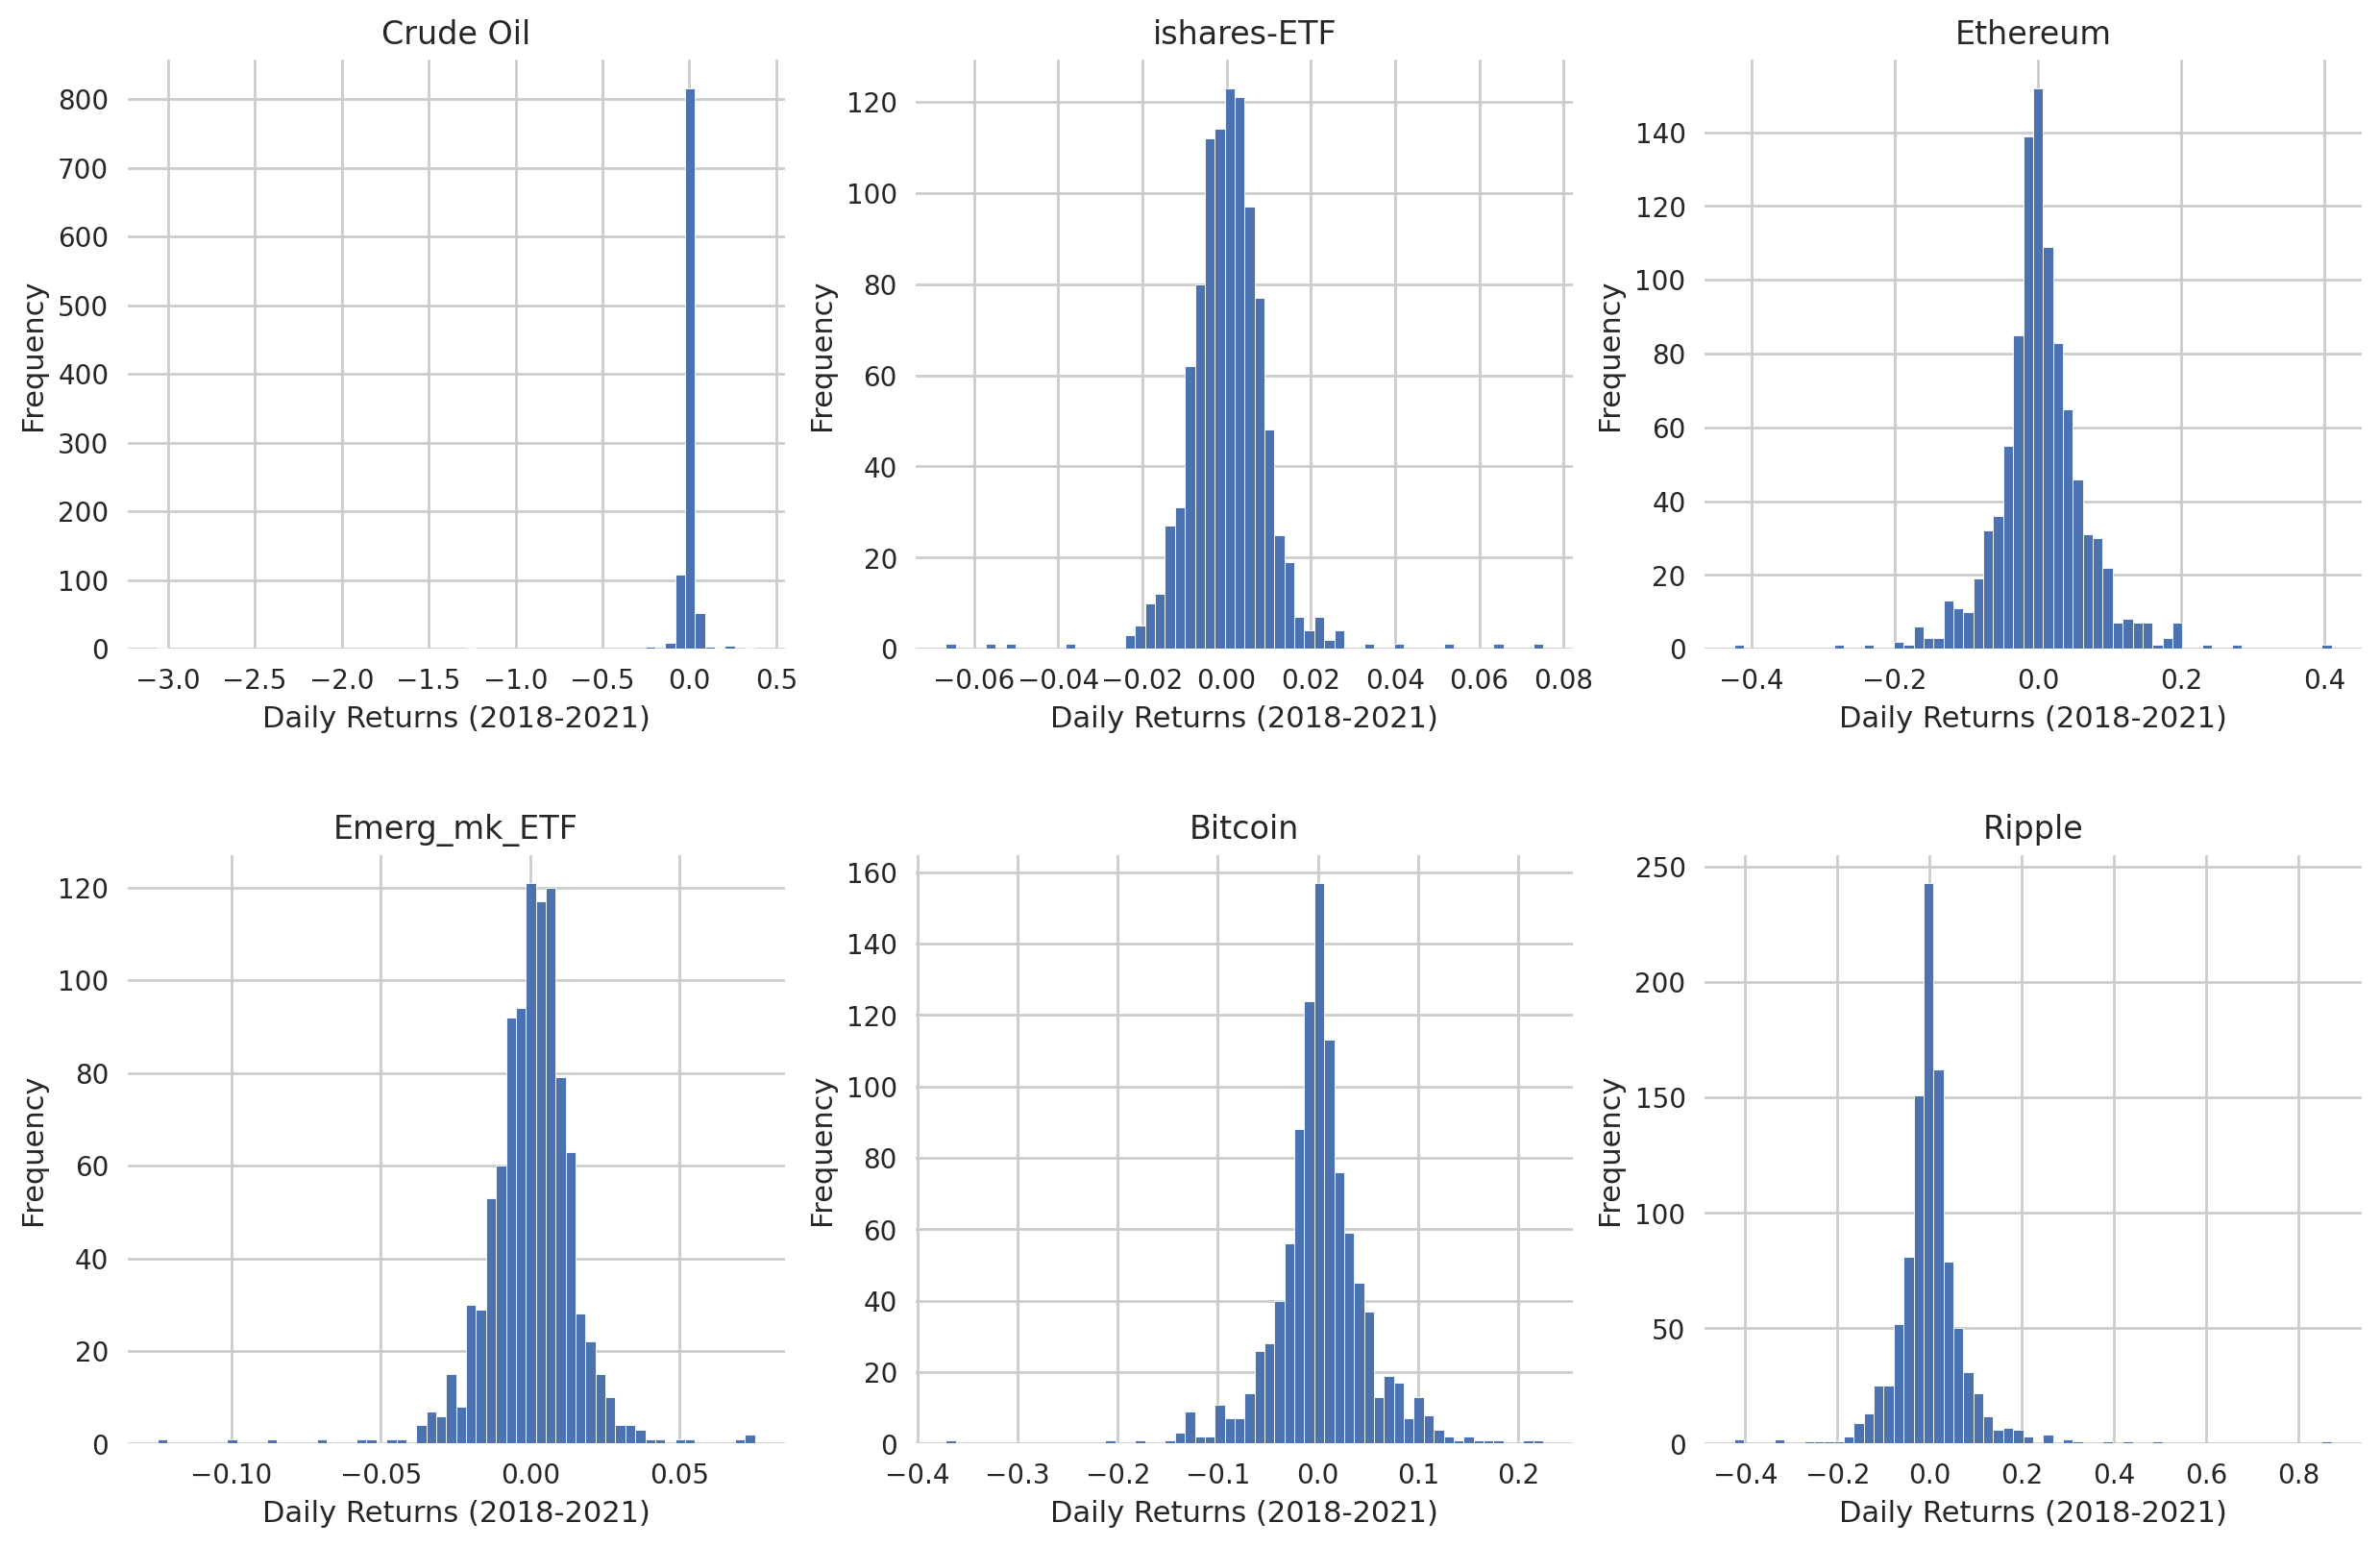

In [ ]:
#High Risk Assets + Crypto

# Get the angles from 0 to 2 pie (360 degree) in narray object
X1 = high_risk_w_crypto.iloc[:,1]
X2 = high_risk_w_crypto.iloc[:,2]
X3 = high_risk_w_crypto.iloc[:,3]
X4 = high_risk_w_crypto.iloc[:,4]
X5 = high_risk_w_crypto.iloc[:,5]
X6 = high_risk_w_crypto.iloc[:,6]
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(figsize=(15,9), nrows=2, ncols=3)

for ax in axis.flat:
    ax.set(xlabel='Daily Returns (2018-2021)', ylabel='Frequency')

# for (m,n), subplot in np.ndenumerate(axis):
#     subplot.set_xlim(-0.5,1.25)
#     subplot.set_ylim(-0.8,0.7)
  
axis[0, 0].hist(X1, bins=60)
axis[0, 0].set_title("Crude Oil")
  
axis[1, 0].hist(X2, bins=60)
axis[1, 0].set_title("Emerg_mk_ETF")
  
axis[0, 1].hist(X3, bins=60)
axis[0, 1].set_title("ishares-ETF")
  
axis[1, 1].hist(X4, bins=60)
axis[1, 1].set_title("Bitcoin")

axis[0, 2].hist(X5, bins=60)
axis[0, 2].set_title("Ethereum")

axis[1, 2].hist(X6, bins=60)
axis[1, 2].set_title("Ripple")

  
# Combine all the operations and display
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

In [ ]:
low_risk_w_crypto

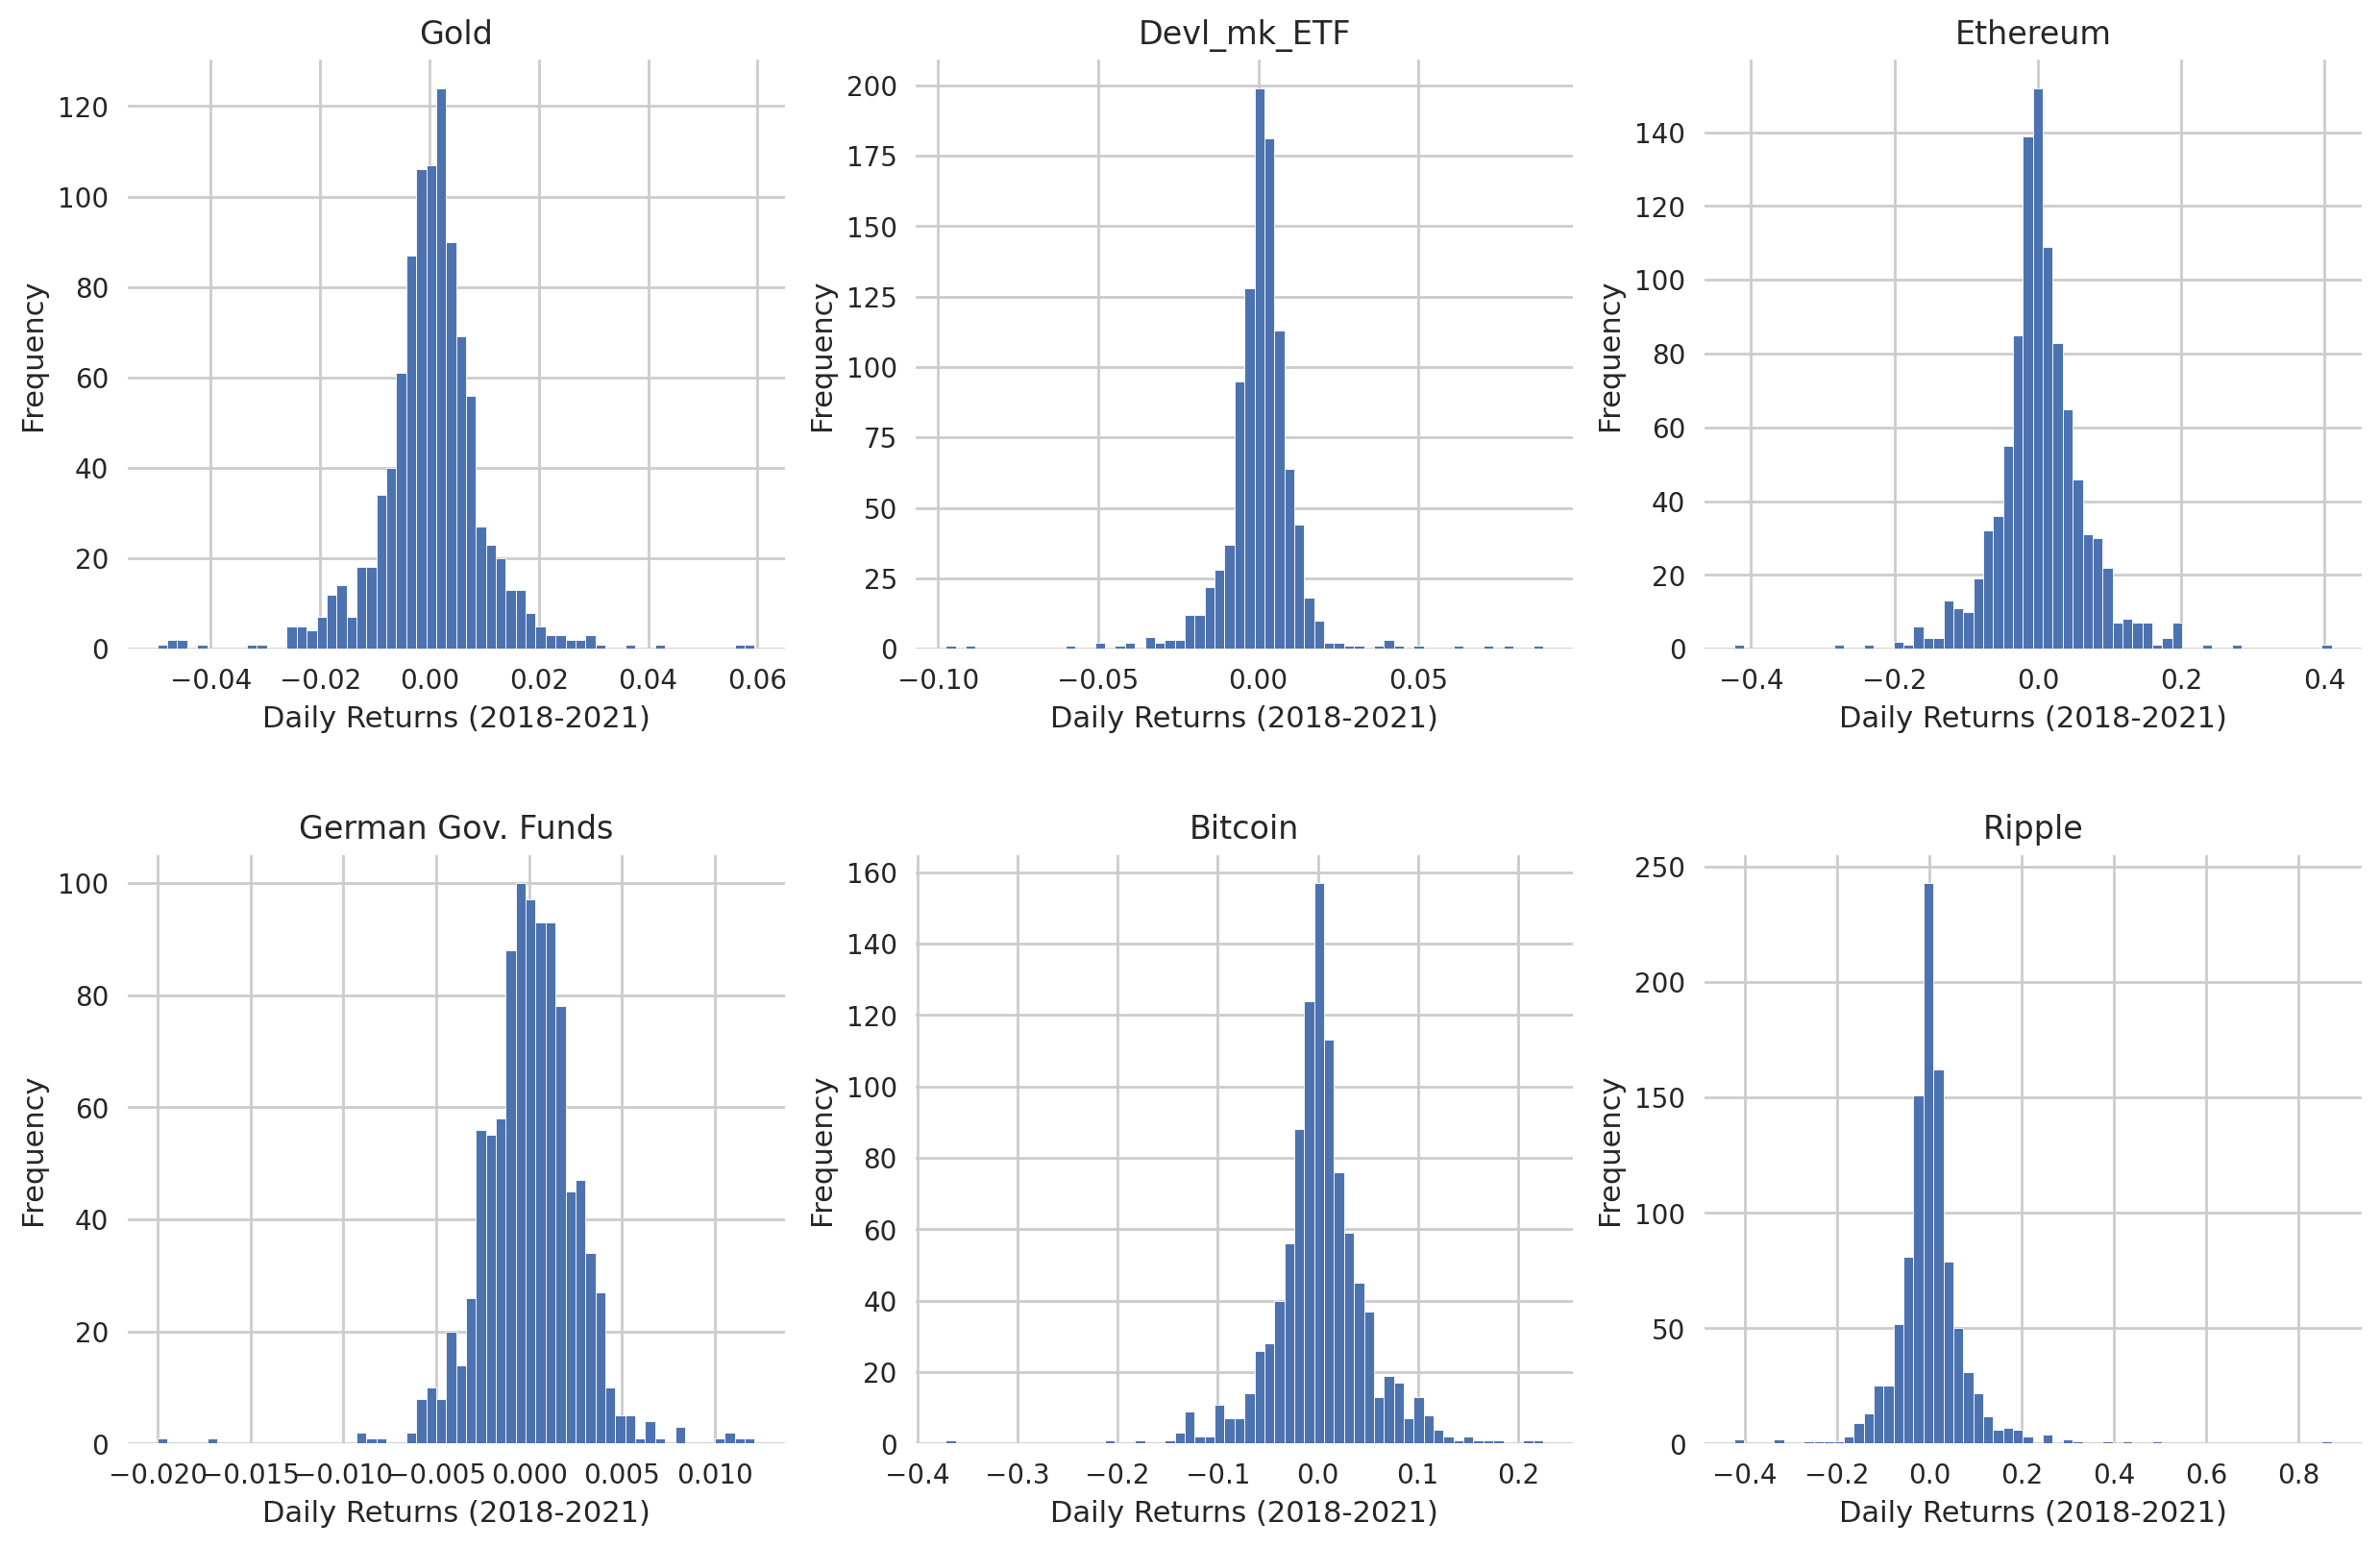

In [ ]:
#High Risk Assets + Crypto

# Get the angles from 0 to 2 pie (360 degree) in narray object
X1 = low_risk_w_crypto.iloc[:,1]
X2 = low_risk_w_crypto.iloc[:,2]
X3 = low_risk_w_crypto.iloc[:,3]
X4 = low_risk_w_crypto.iloc[:,4]
X5 = low_risk_w_crypto.iloc[:,5]
X6 = low_risk_w_crypto.iloc[:,6]
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(figsize=(15,9), nrows=2, ncols=3)

for ax in axis.flat:
    ax.set(xlabel='Daily Returns (2018-2021)', ylabel='Frequency')

# for (m,n), subplot in np.ndenumerate(axis):
#     subplot.set_xlim(-0.5,1.25)
#     subplot.set_ylim(-0.8,0.7)
  
axis[0, 0].hist(X1, bins=60)
axis[0, 0].set_title("Gold")
  
axis[1, 0].hist(X2, bins=60)
axis[1, 0].set_title("German Gov. Funds")
  
axis[0, 1].hist(X3, bins=60)
axis[0, 1].set_title("Devl_mk_ETF")
  
axis[1, 1].hist(X4, bins=60)
axis[1, 1].set_title("Bitcoin")

axis[0, 2].hist(X5, bins=60)
axis[0, 2].set_title("Ethereum")

axis[1, 2].hist(X6, bins=60)
axis[1, 2].set_title("Ripple")

  
# Combine all the operations and display
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

In [ ]:
low_risk_portfolio_data

In [ ]:
cryptocurrency_data

,BTC-USD,ETH-USD,XRP-USD
Date,,,
2018-01-02,14982.099609,884.443970,2.480900
2018-01-03,15201.000000,962.719971,3.105370
2018-01-04,15599.200195,980.921997,3.196630
2018-01-05,17429.500000,997.719971,3.048710
2018-01-08,15170.099609,1148.530029,2.456210
...,...,...,...
2021-12-23,50784.539062,4108.015625,0.993285
2021-12-27,50640.417969,4037.547607,0.926184
2021-12-28,47588.855469,3800.893066,0.852960


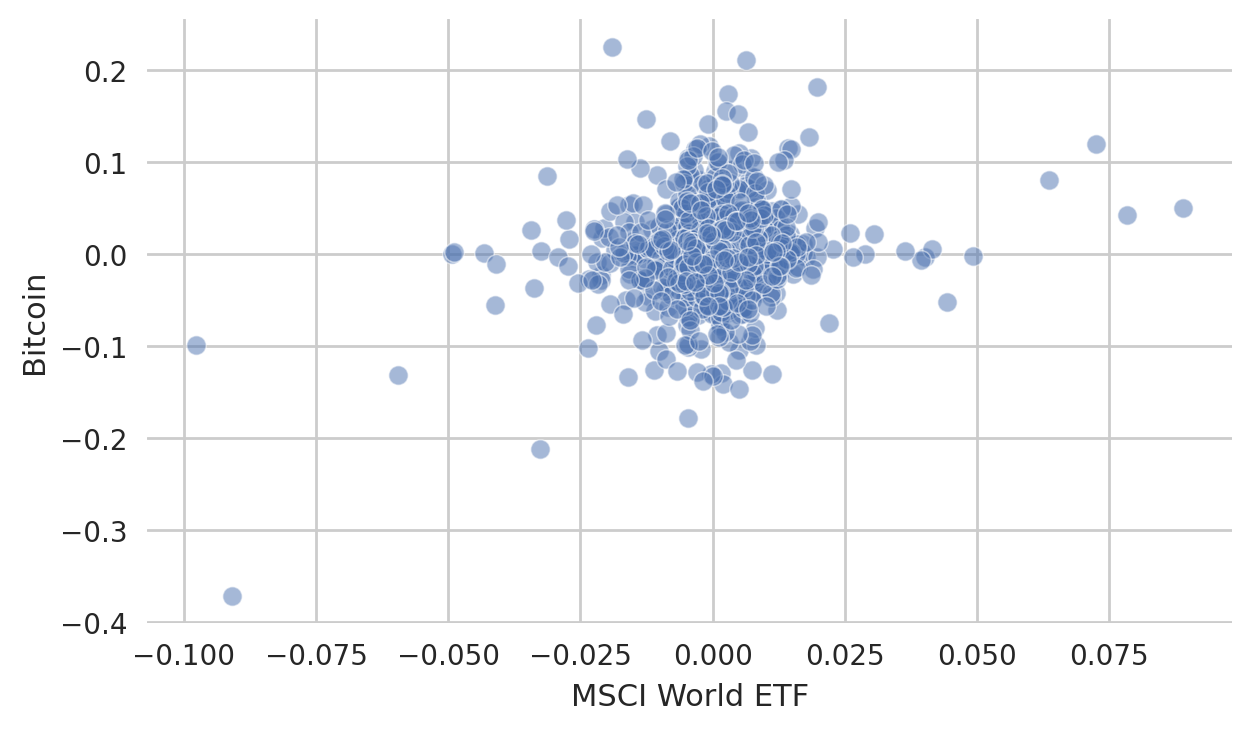

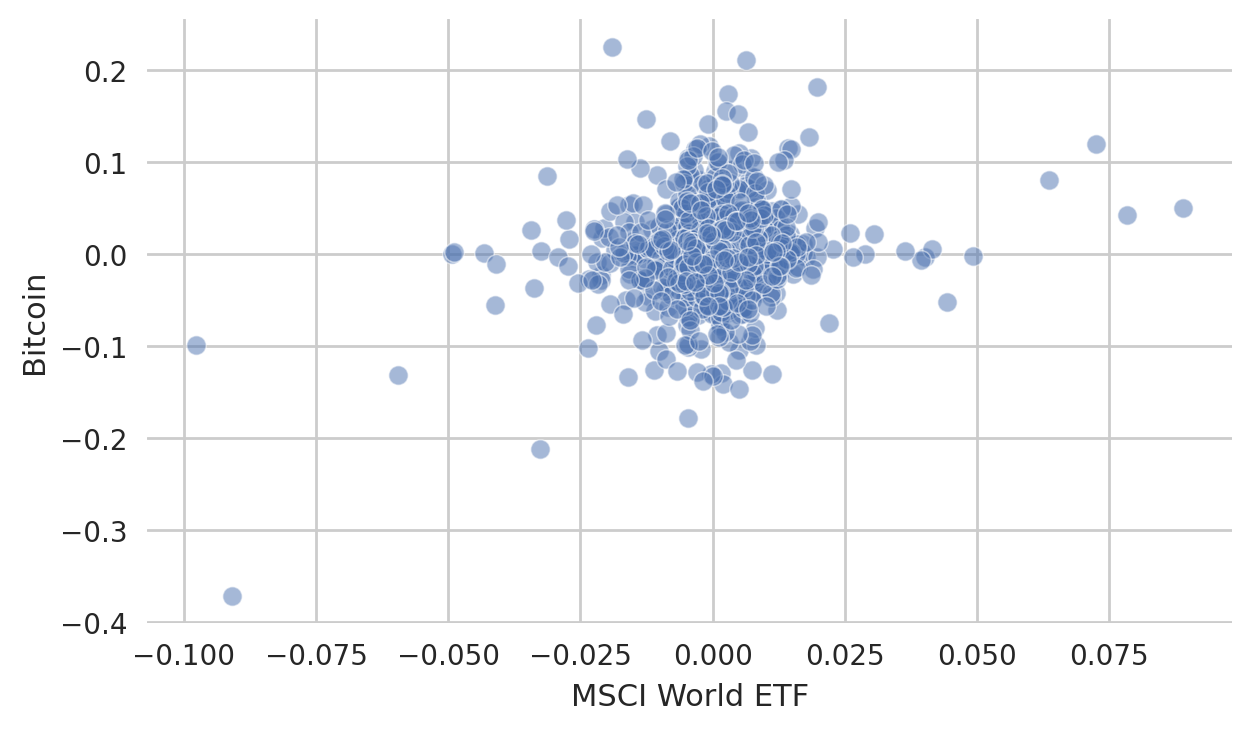

In [ ]:
#low_risk_w_crypto
plt.figure(figsize=(7,4))
sns.scatterplot(data=low_risk_w_crypto, x="MSCI_World", y="Bitcoin", alpha=0.5)
plt.xlabel("MSCI World ETF")
plt.show()
